In [41]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.ensemble import IsolationForest

warnings.filterwarnings("ignore")

# Data Analysis

In [5]:
bank_data = pd.read_csv('bank.csv', header = 0, delimiter = ';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
bank_data.info()
bank_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank_full_data = pd.read_csv('bank-full.csv', header = 0, delimiter = ';')
bank_full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
bank_full_data.info()
bank_full_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [131]:
bank_add_data = pd.read_csv('bank-additional.csv', header = 0, delimiter = ';')
bank_add_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [132]:
bank_add_data.info()
bank_add_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [133]:
bank_add_full_data = pd.read_csv('bank-additional-full.csv', header = 0, delimiter = ';')
bank_add_full_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [134]:
bank_full_data.info()
bank_full_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##### This shows that there are no missing/ NA values in any of the data

In [33]:
print(f' There are {bank_add_full_data.duplicated().sum()} duplicates in bank_add_full_data.')
bank_add_full_data.drop_duplicates(inplace = True, keep = 'first')

 There are 12 duplicates in bank_add_full_data.


In [14]:
print(f' There are {bank_data.duplicated().sum()} duplicates in bank_data.')
bank_data.drop_duplicates(inplace = True, keep = 'first')

 There are 0 duplicates in bank_data.


In [15]:
print(f' There are {bank_add_data.duplicated().sum()} duplicates in bank_add_data.')
bank_add_full_data.drop_duplicates(inplace = True, keep = 'first')

 There are 0 duplicates in bank_add_data.


In [16]:
print(f' There are {bank_full_data.duplicated().sum()} duplicates in bank_full_data.')
bank_full_data.drop_duplicates(inplace = True, keep = 'first')

 There are 0 duplicates in bank_full_data.


#### This shows that there are 12 duplicates in bank_add_full_data, but no duplicates in other data

In [135]:
bank_add_full_data.drop("duration", axis = 1, inplace = True)
bank_add_data.drop("duration", axis = 1, inplace = True)

Cleaned data by removing the duration column as instructed.

### Numerical Data

#### Outlier Detection 

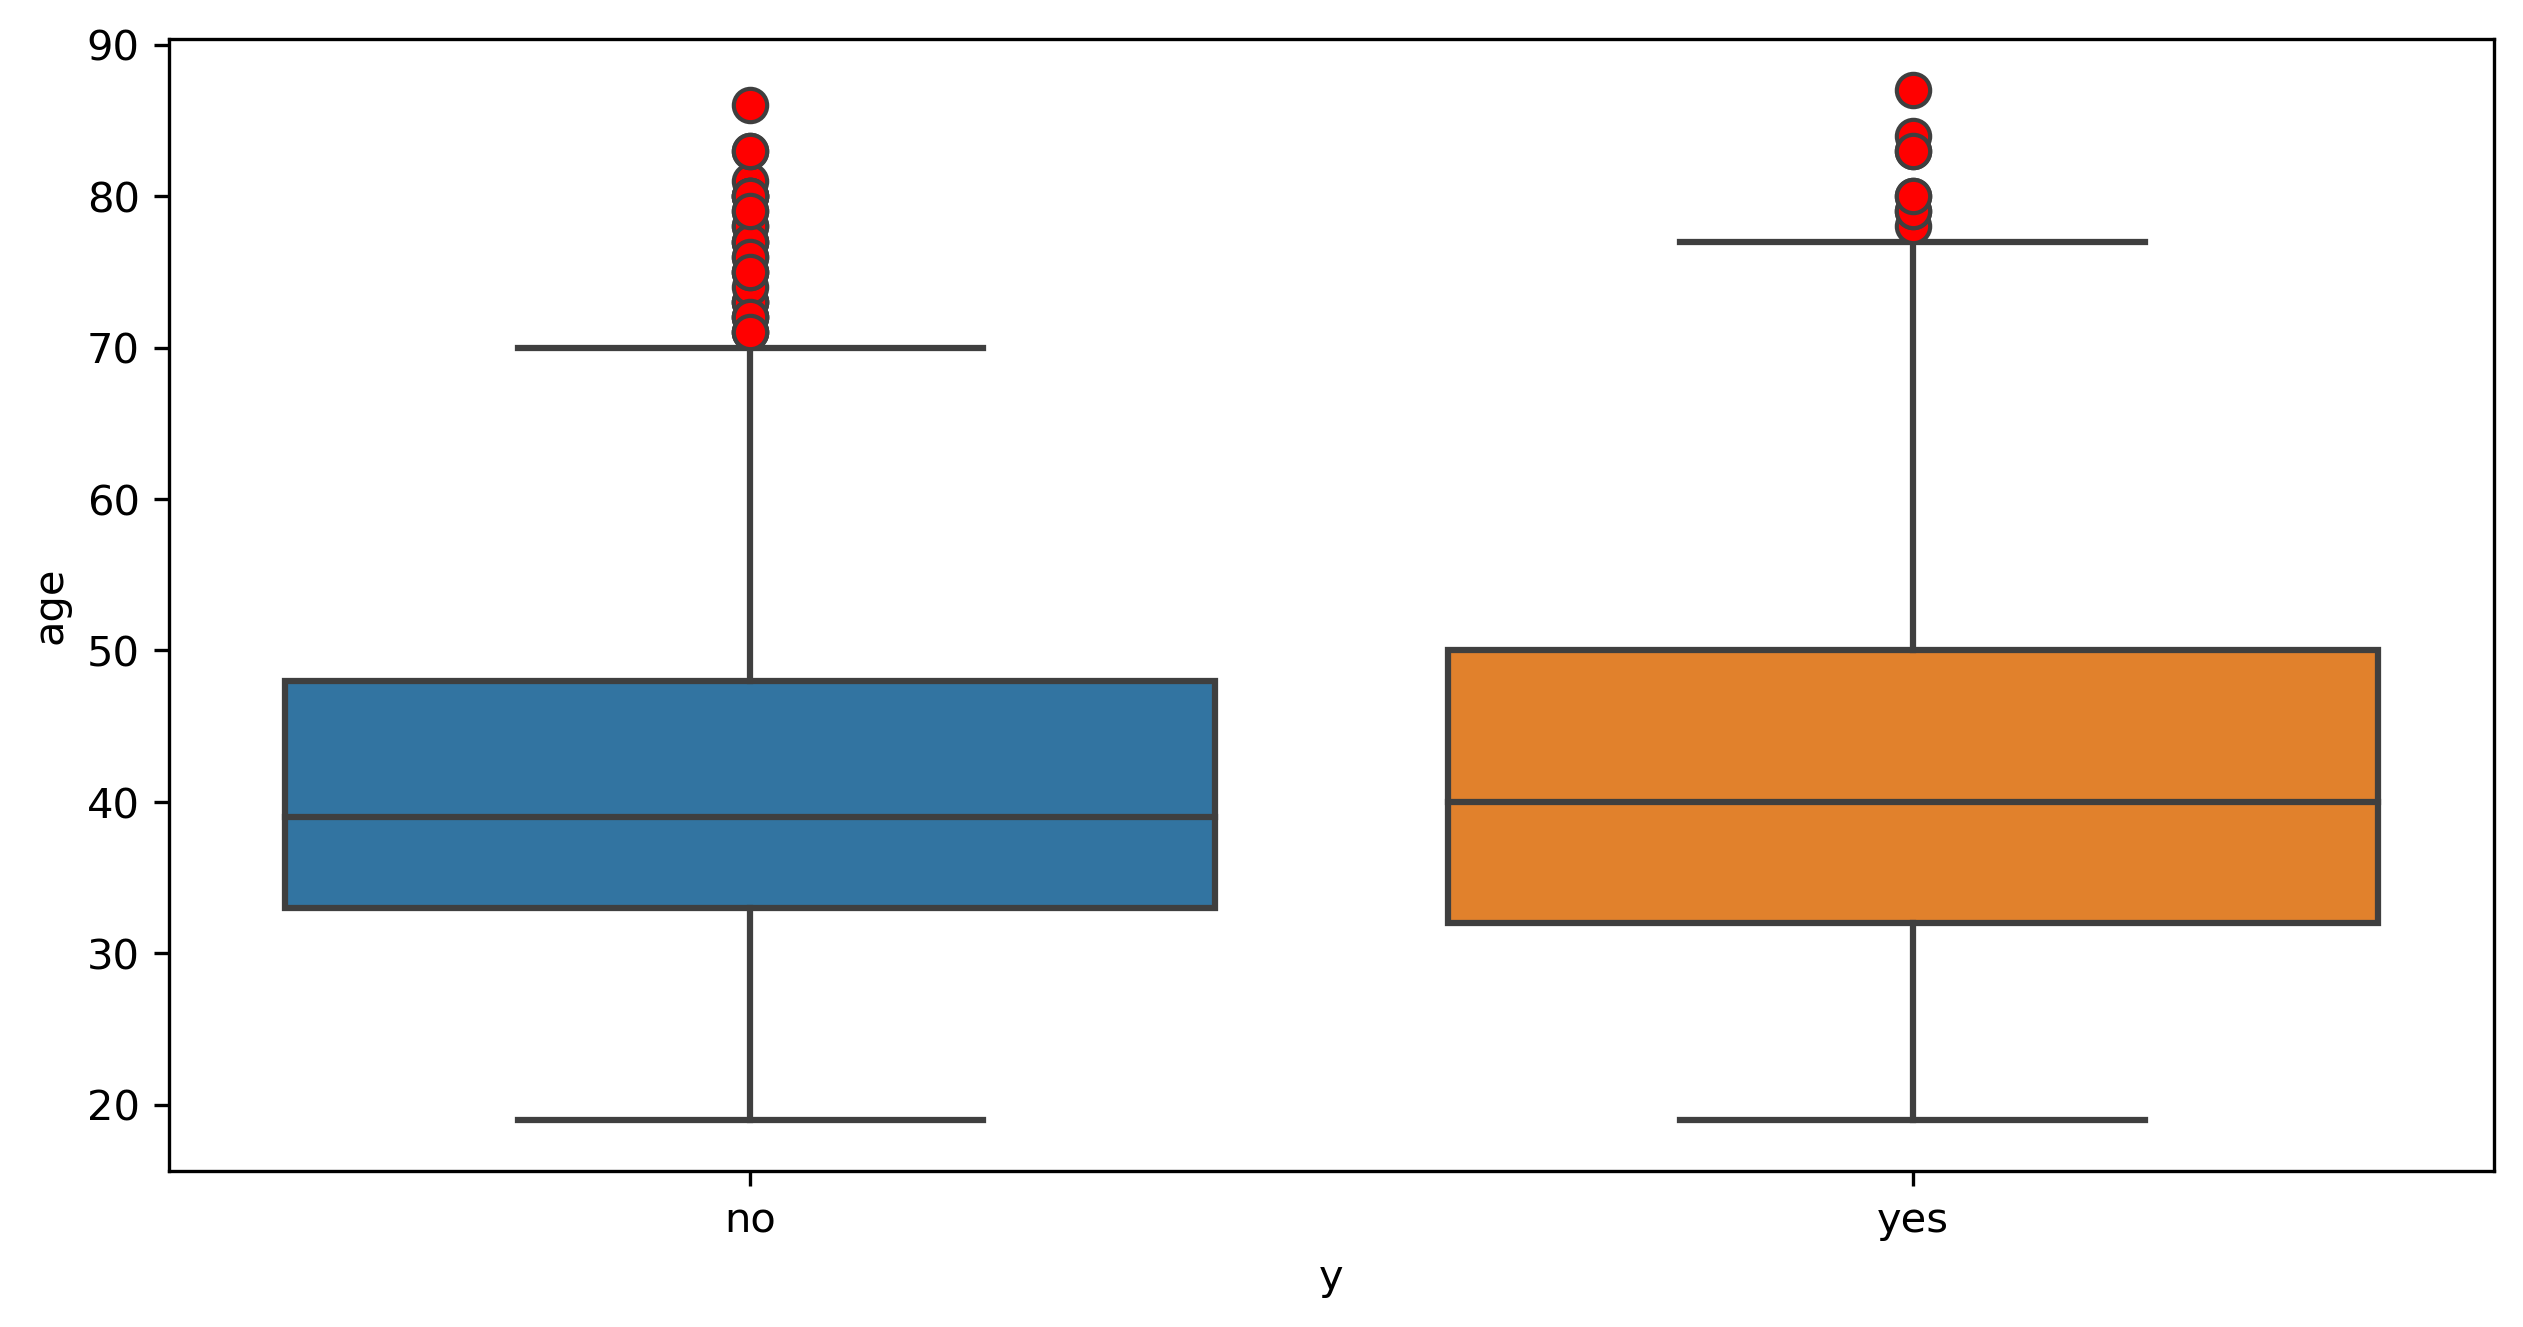

In [93]:
ax = sns.boxplot(data = bank_data, y = bank_data["age"], x = "y", flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
ax.figure.set_size_inches(10, 5)

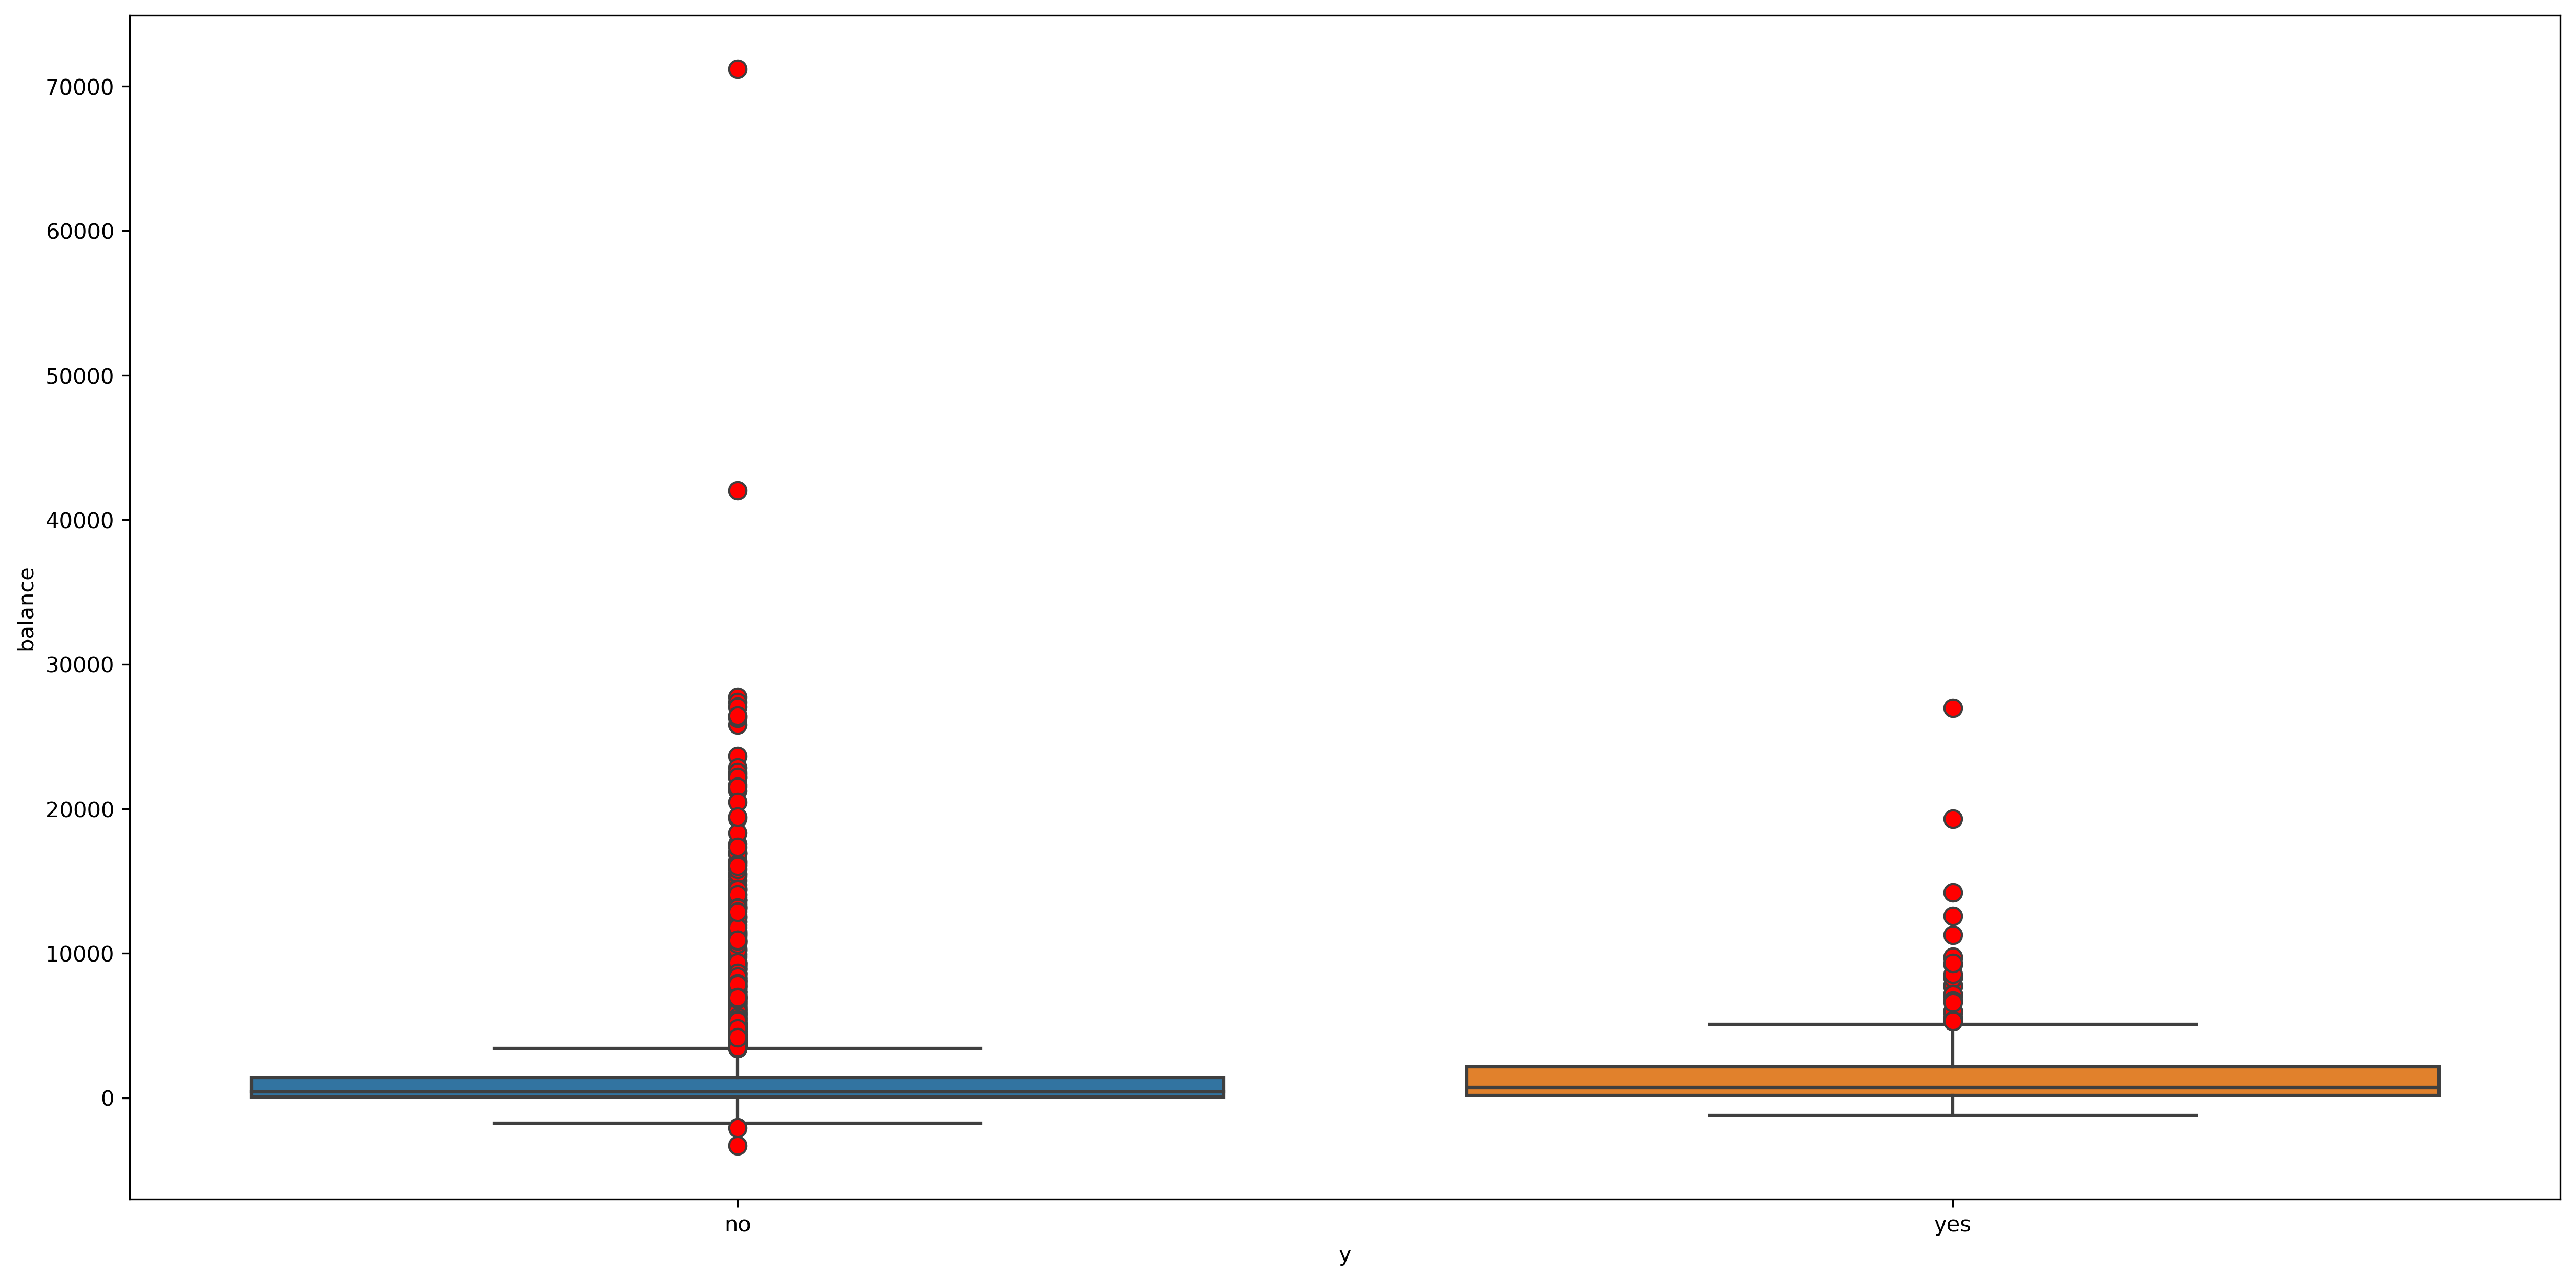

In [102]:
ax = sns.boxplot(data = bank_data, y = bank_data["balance"], x = "y", flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
ax.figure.set_size_inches(20, 10)

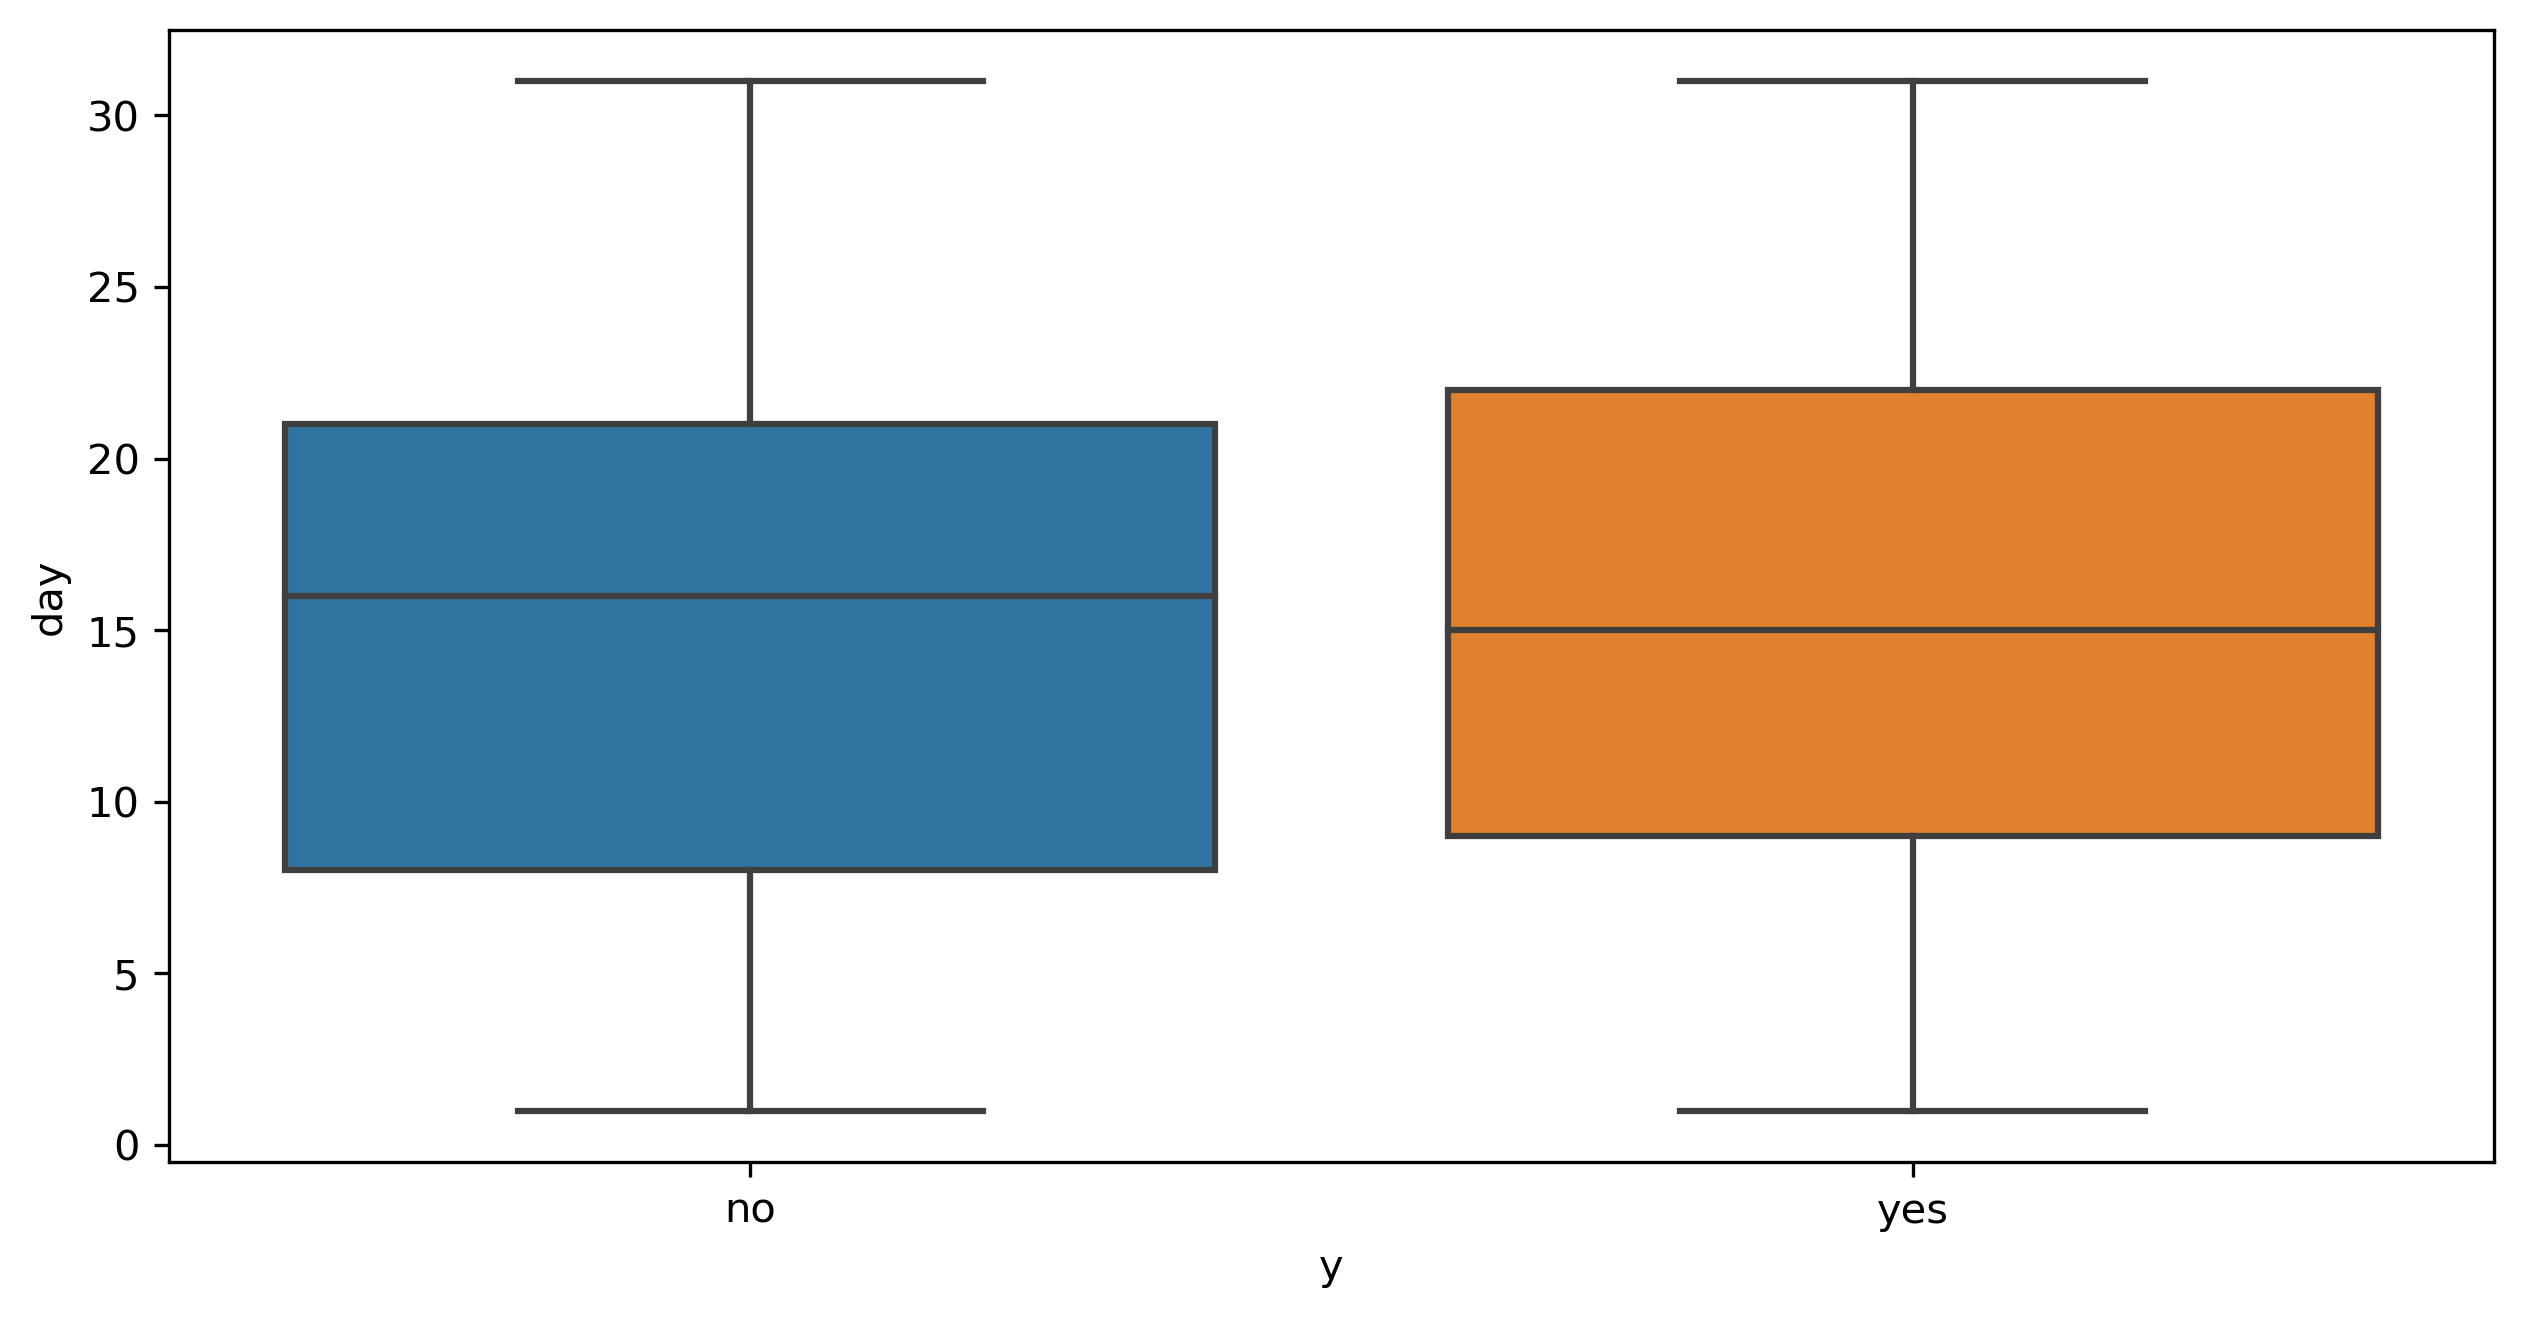

In [104]:
ax = sns.boxplot(data = bank_data, y = bank_data["day"], x = "y", flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
ax.figure.set_size_inches(10, 5)

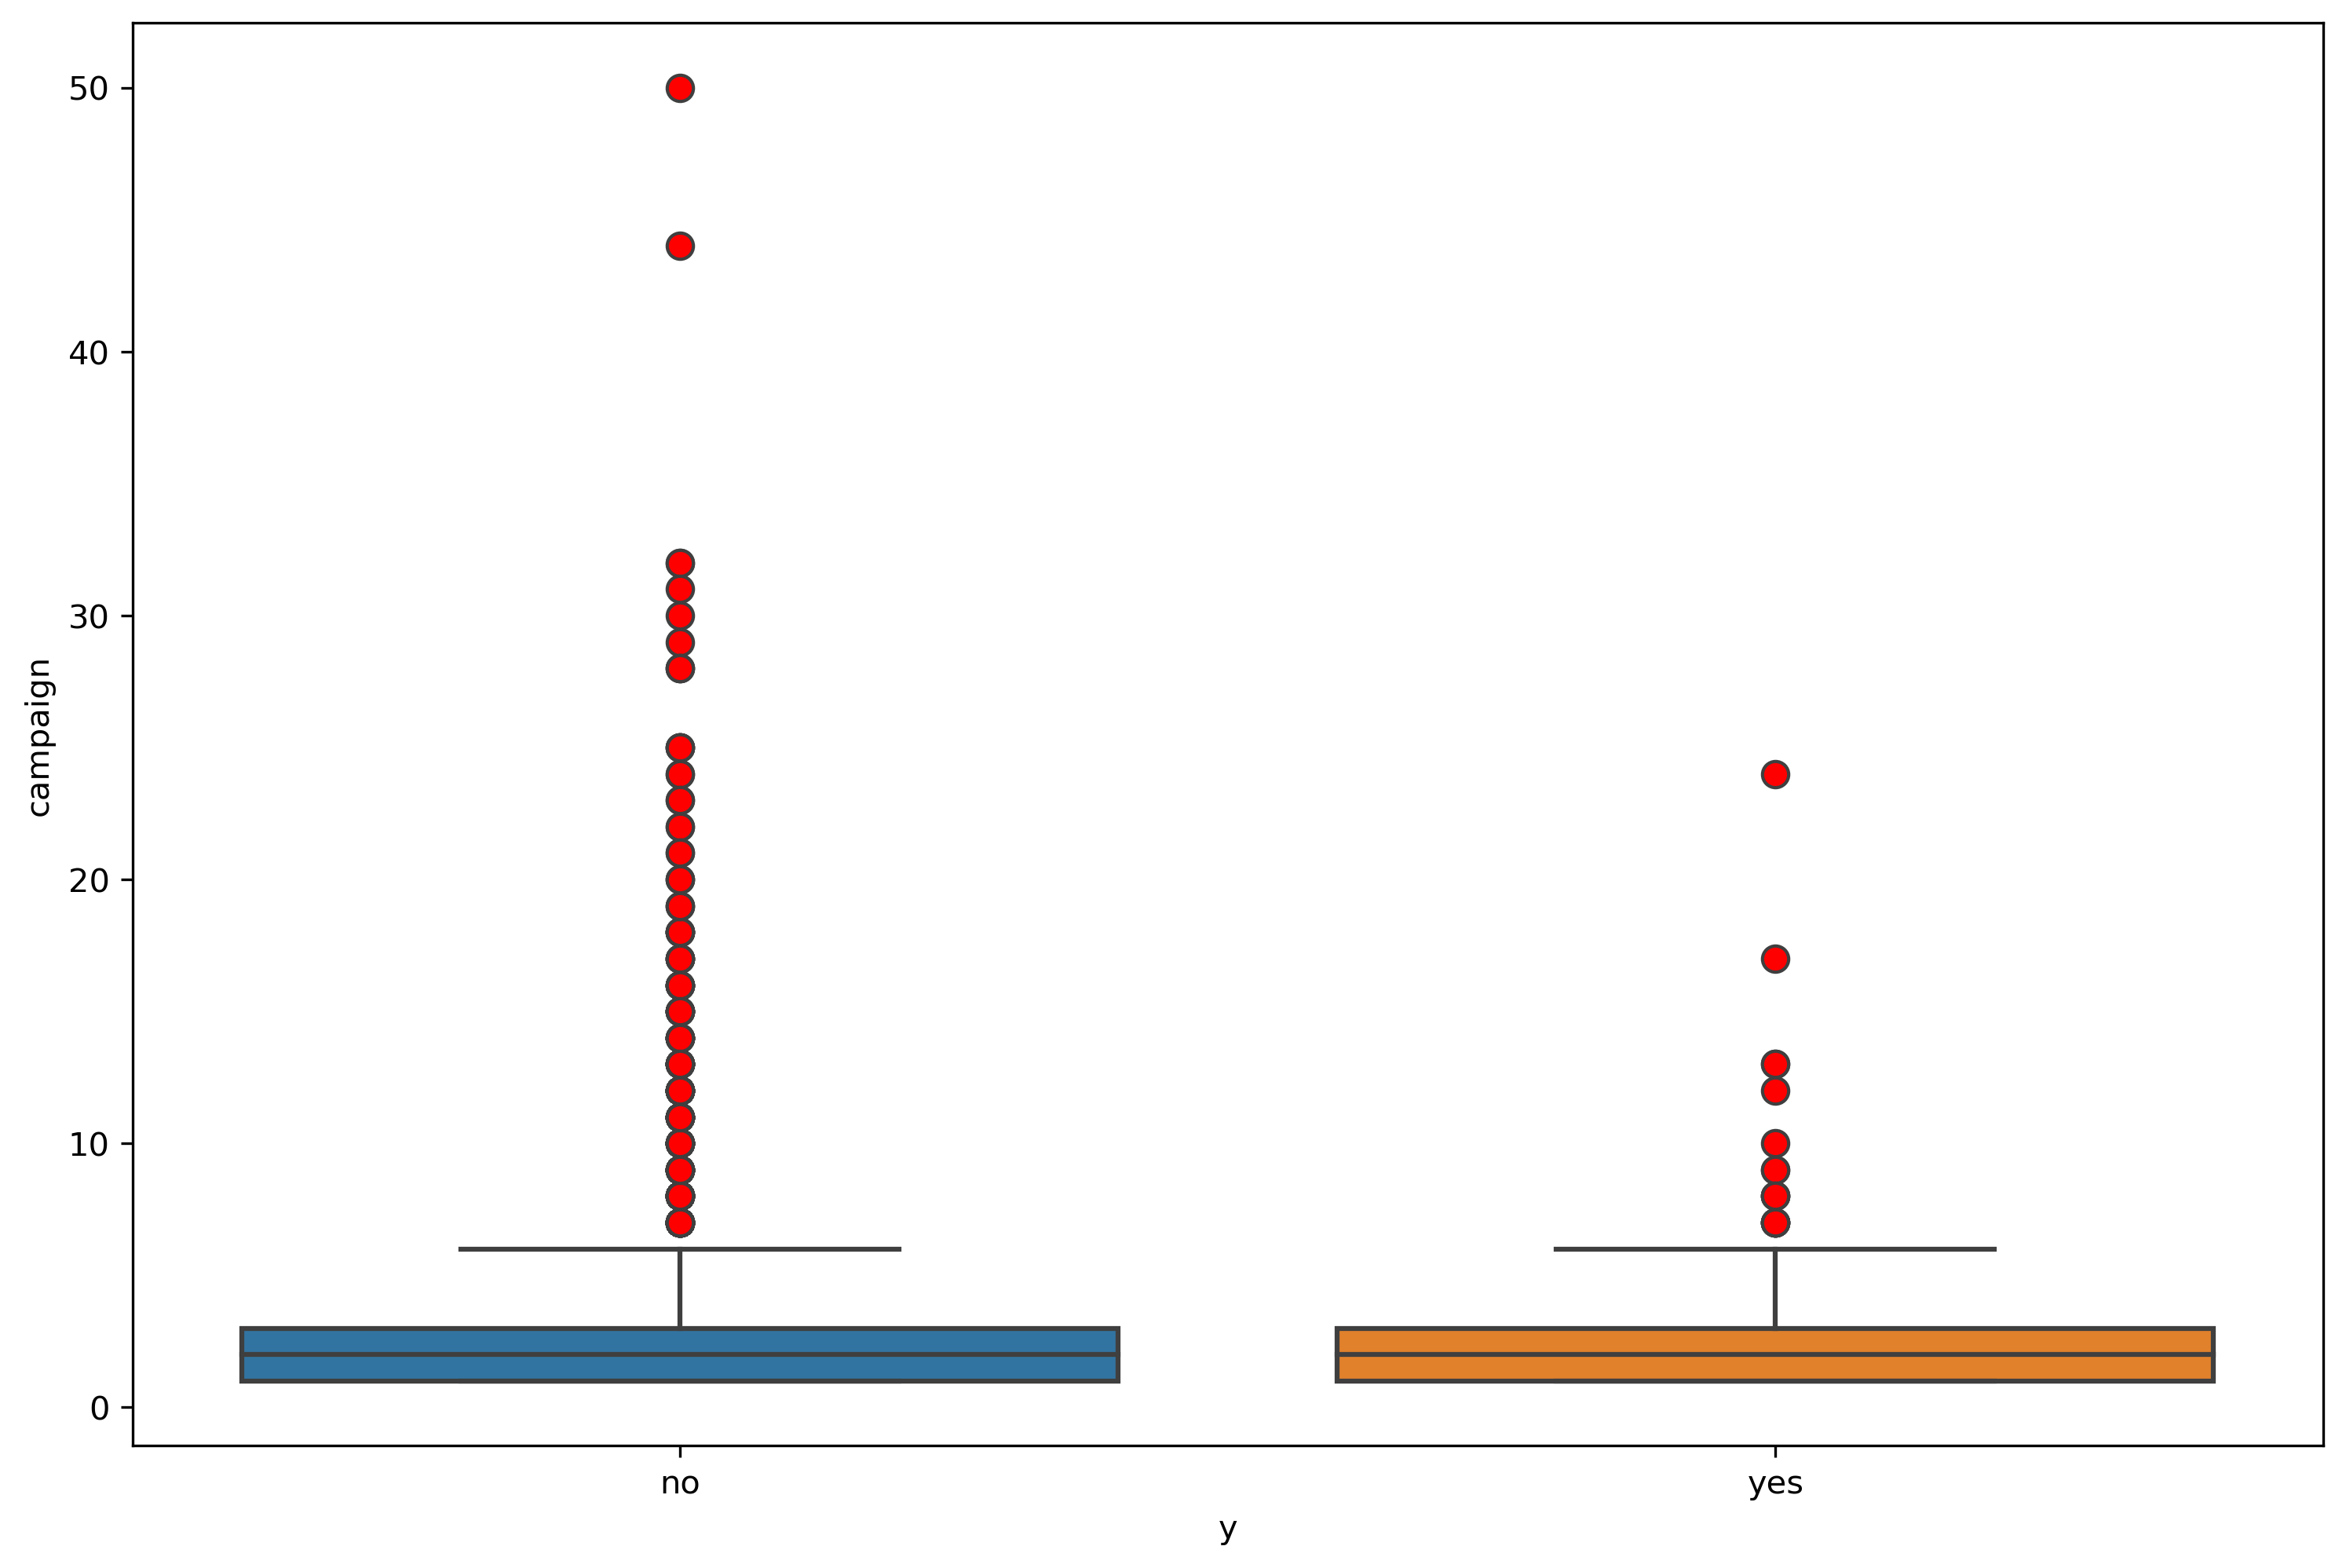

In [107]:
ax = sns.boxplot(data = bank_data, y = bank_data["campaign"], x = "y", flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
ax.figure.set_size_inches(12, 8)

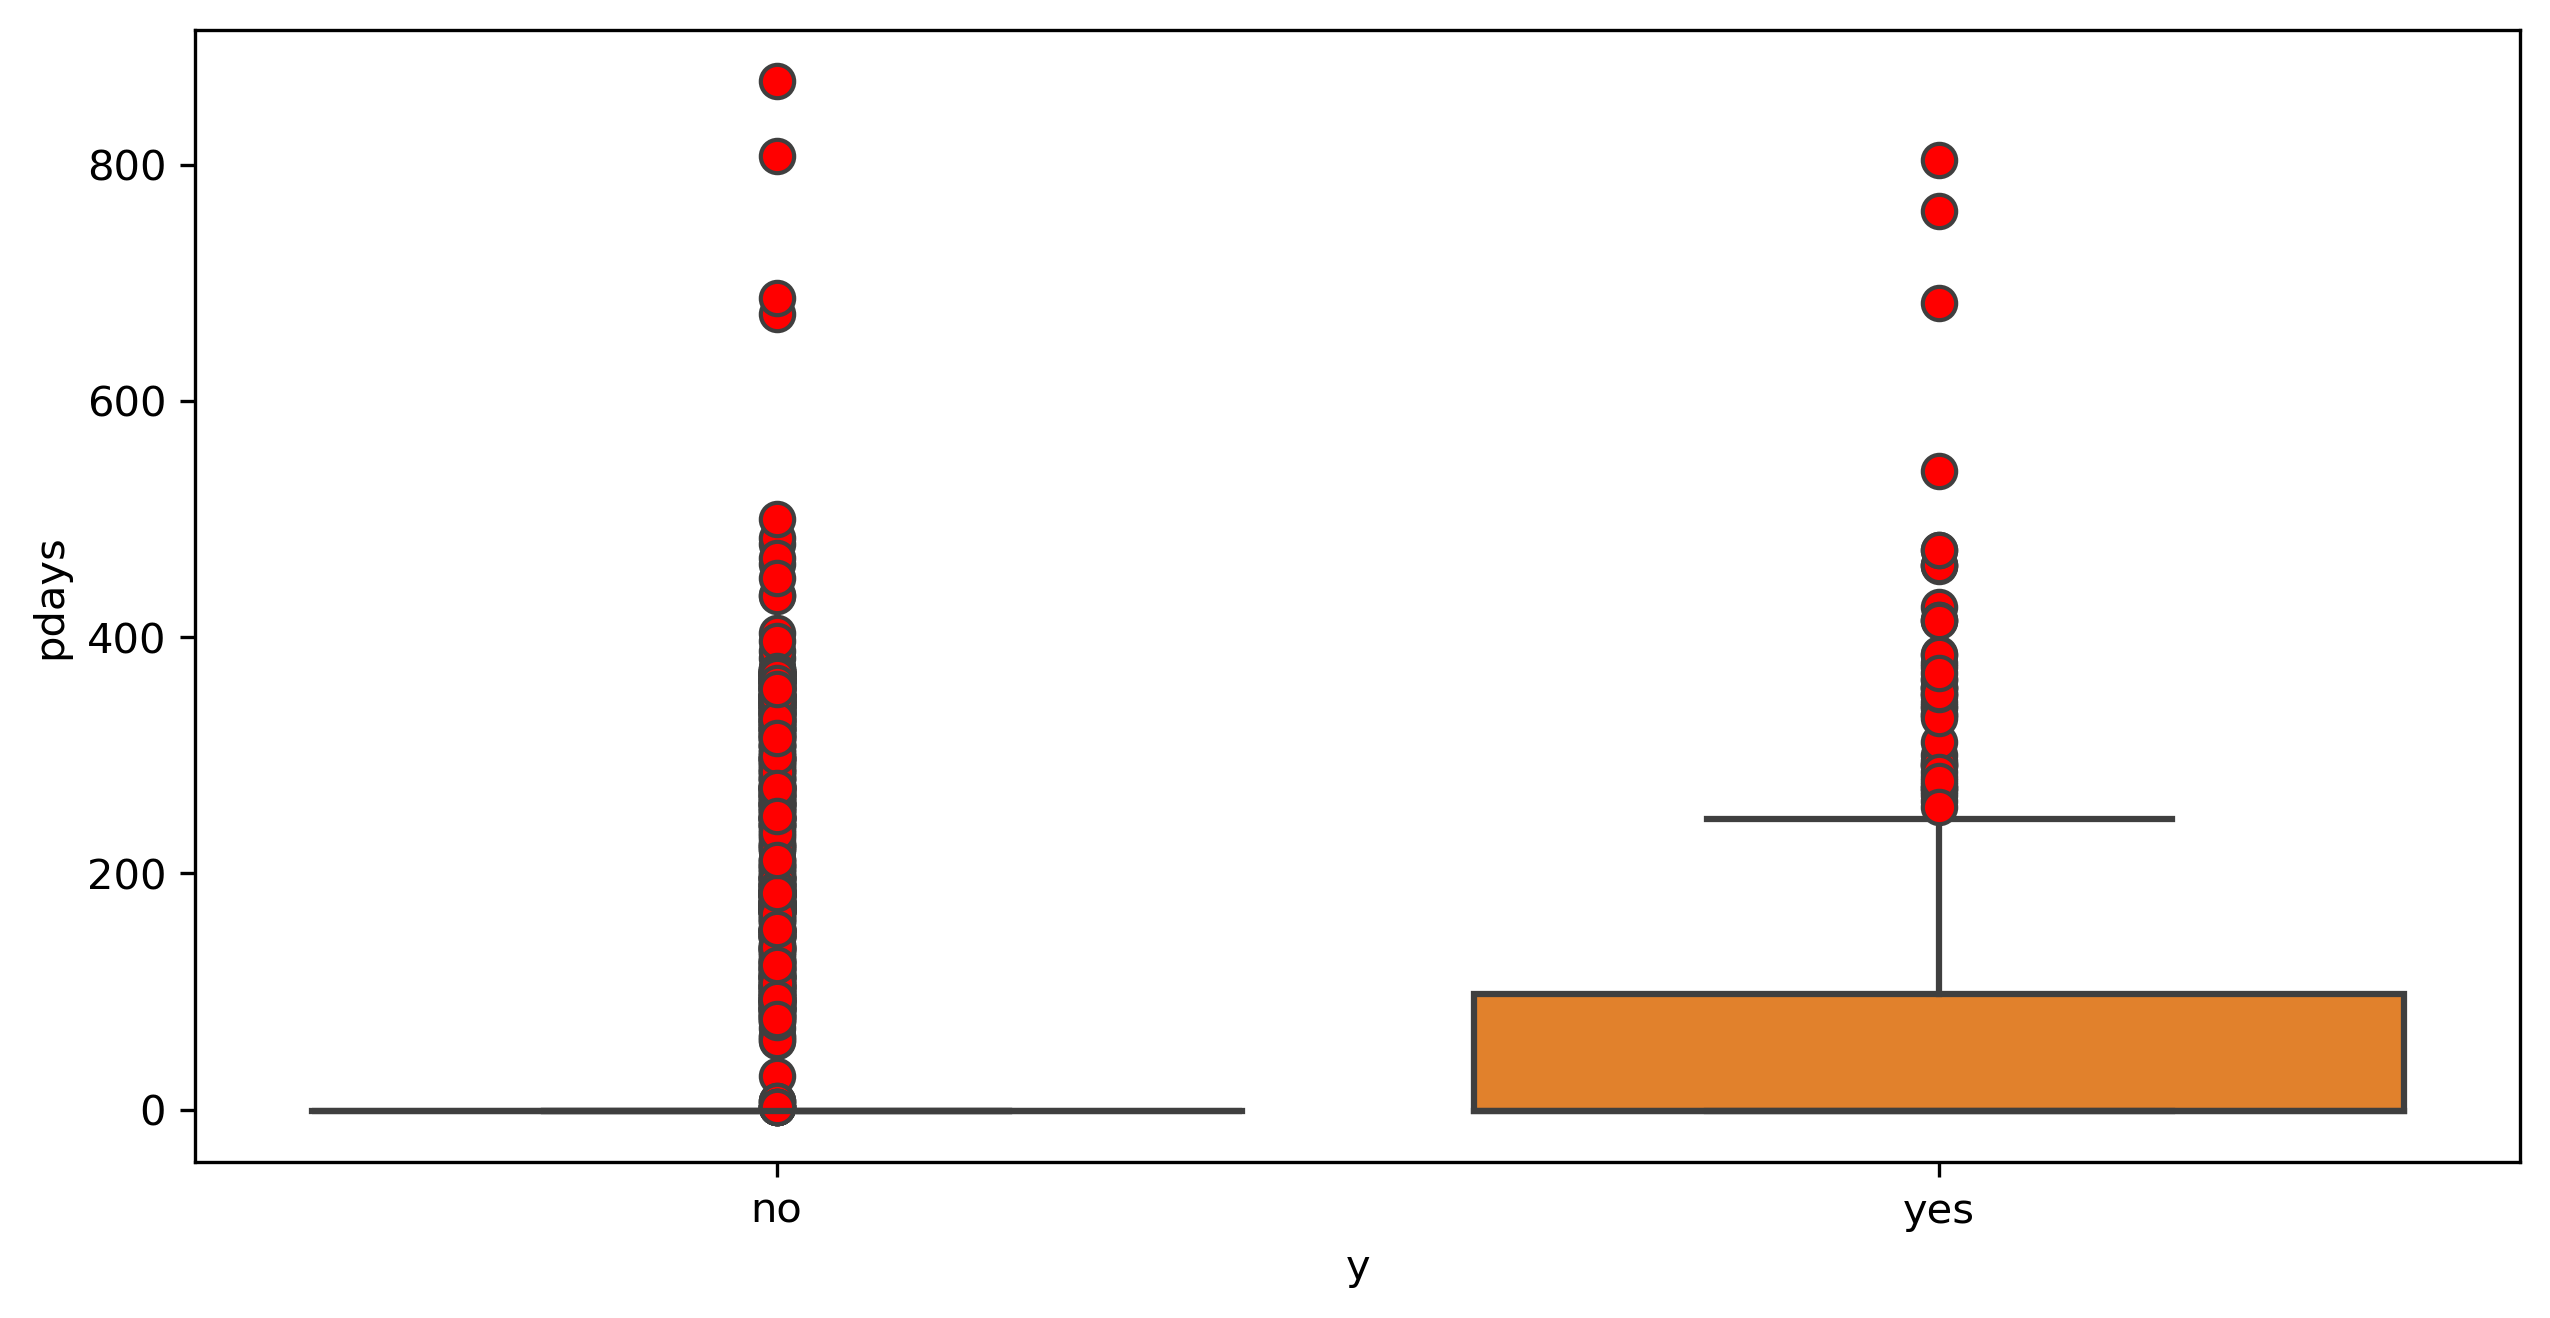

In [109]:
ax = sns.boxplot(data = bank_data, y = bank_data["pdays"], x = "y", flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
ax.figure.set_size_inches(10, 5)

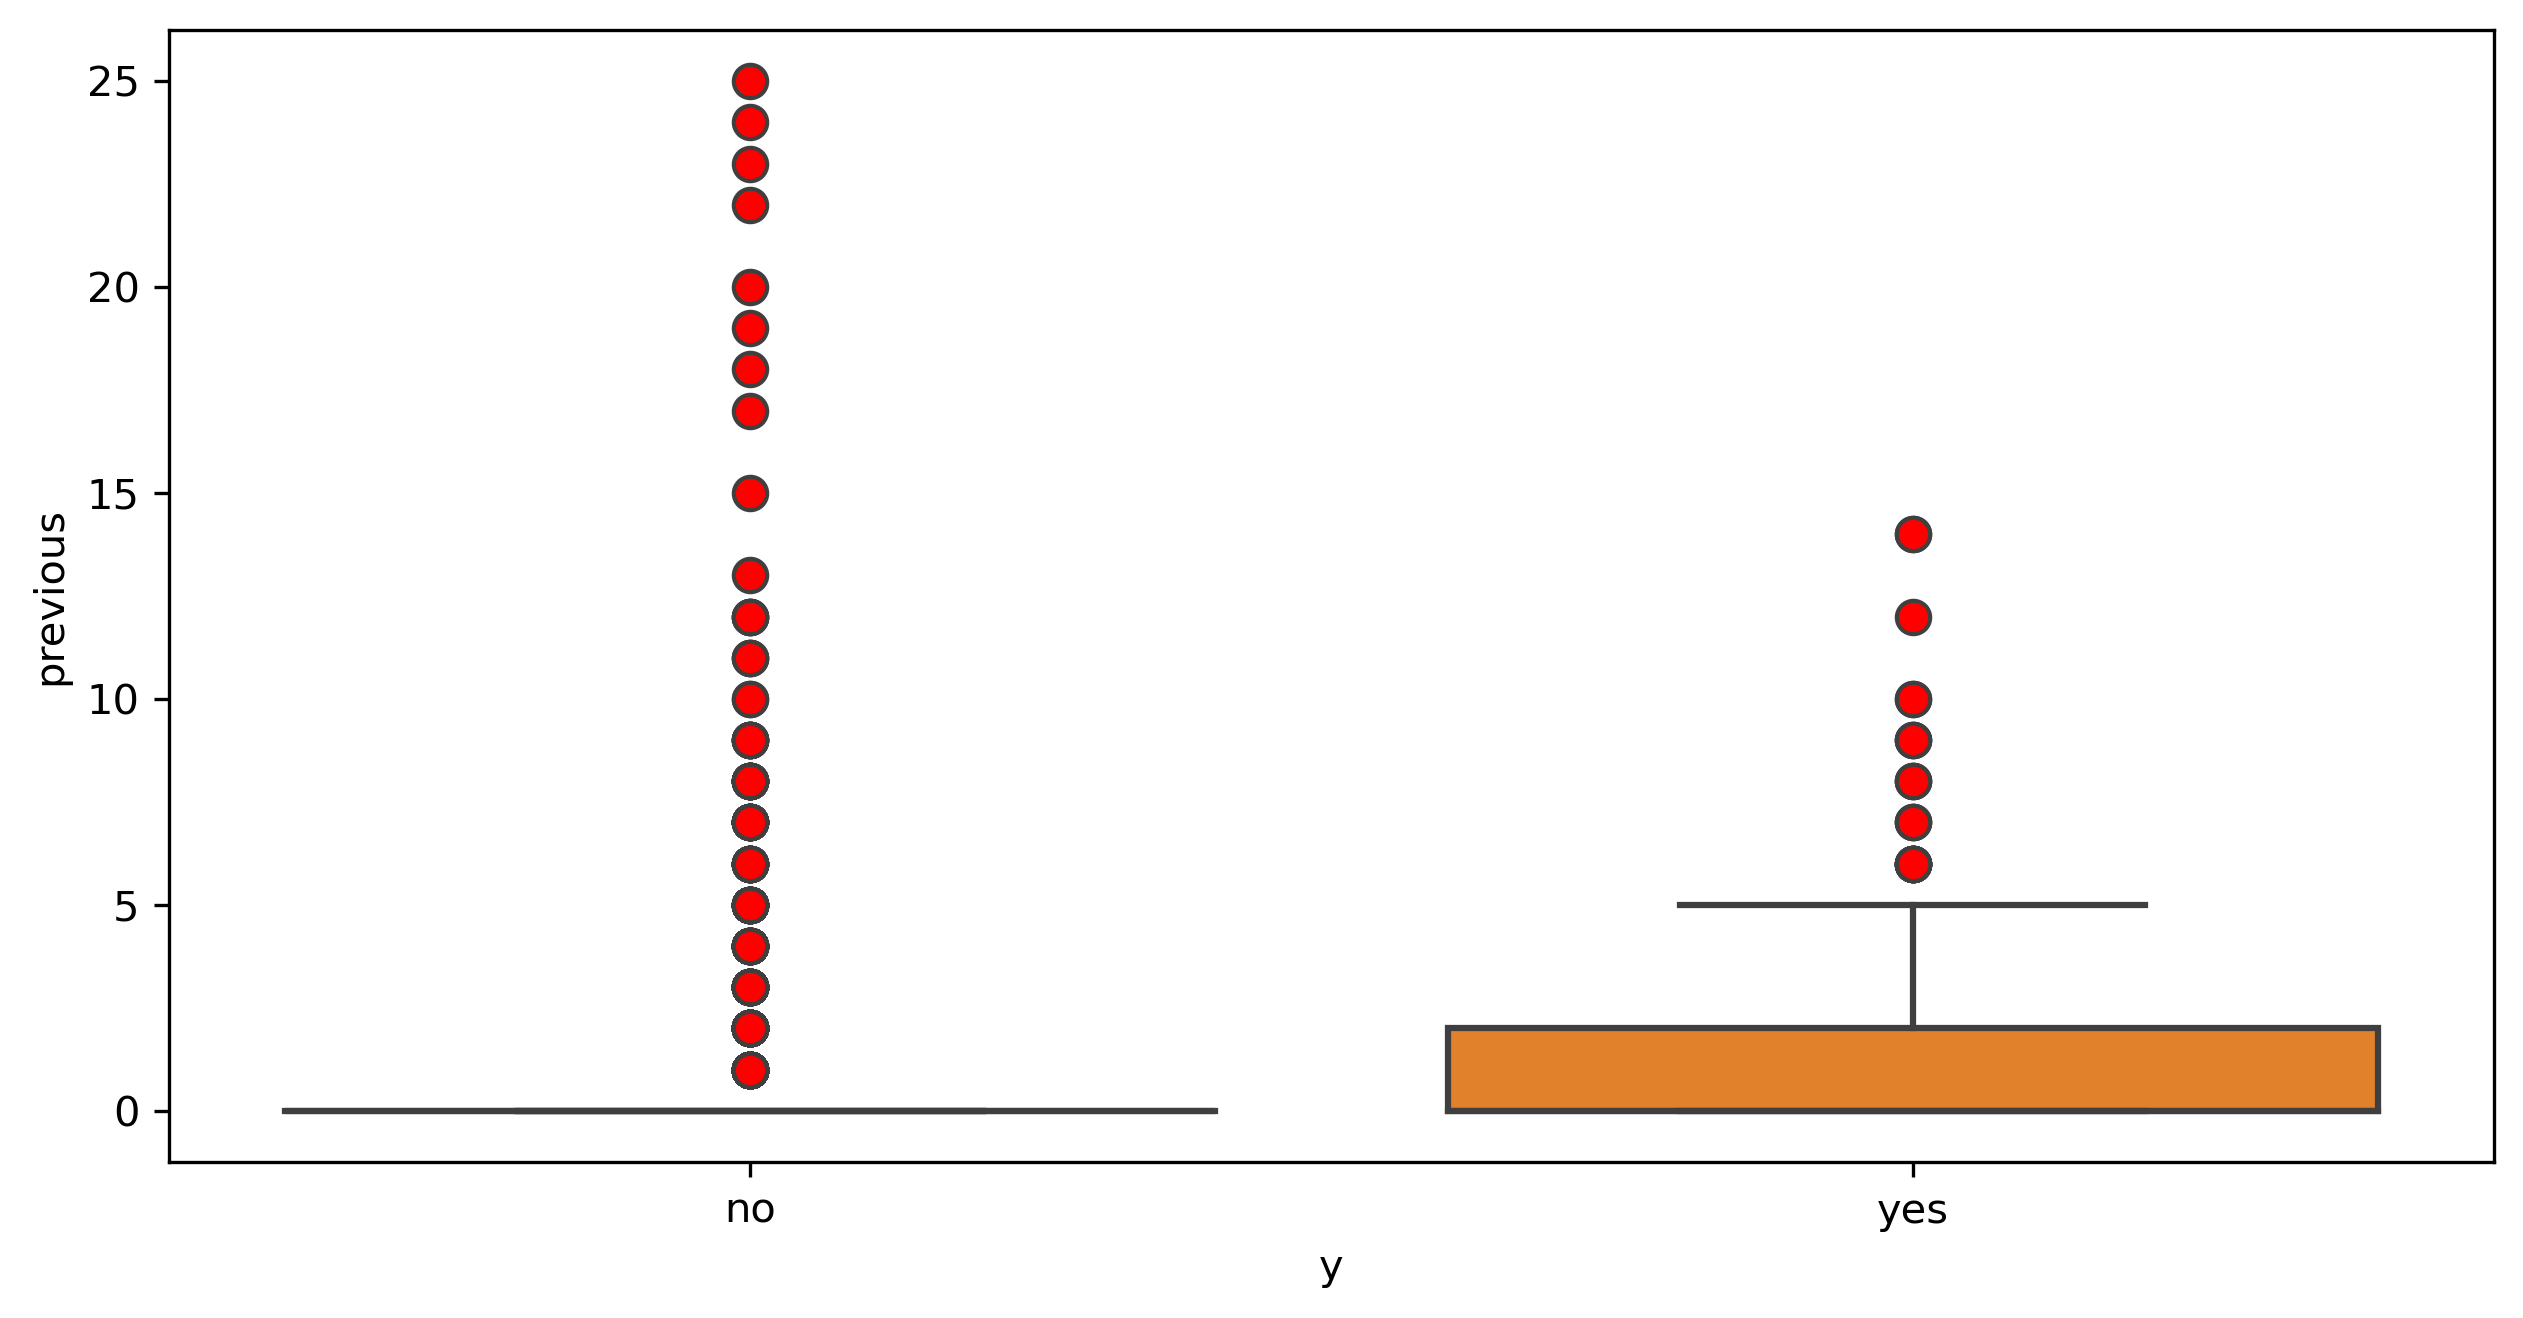

In [110]:
ax = sns.boxplot(data = bank_data, y = bank_data["previous"], x = "y", flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
ax.figure.set_size_inches(10, 5)

Each of the red dots represents an outlier in the data. From this, we can see that there are many outliers in the numerical data of bank_add_full_data. 

In [136]:
summary_stats = bank_add_full_data.describe()
print(summary_stats)

               age      campaign         pdays      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.567593    962.475454      0.172963      0.081886   
std       10.42125      2.770014    186.910907      0.494901      1.570960   
min       17.00000      1.000000      0.000000      0.000000     -3.400000   
25%       32.00000      1.000000    999.000000      0.000000     -1.800000   
50%       38.00000      2.000000    999.000000      0.000000      1.100000   
75%       47.00000      3.000000    999.000000      0.000000      1.400000   
max       98.00000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    41188.000000   41188.000000  41188.000000  41188.000000  
mean        93.575664     -40.502600      3.621291   5167.035911  
std          0.578840       4.628198      1.734447     72.251528  
min         92.201000     -50

### Categorical Data

Text(0.5, 0, 'Job')

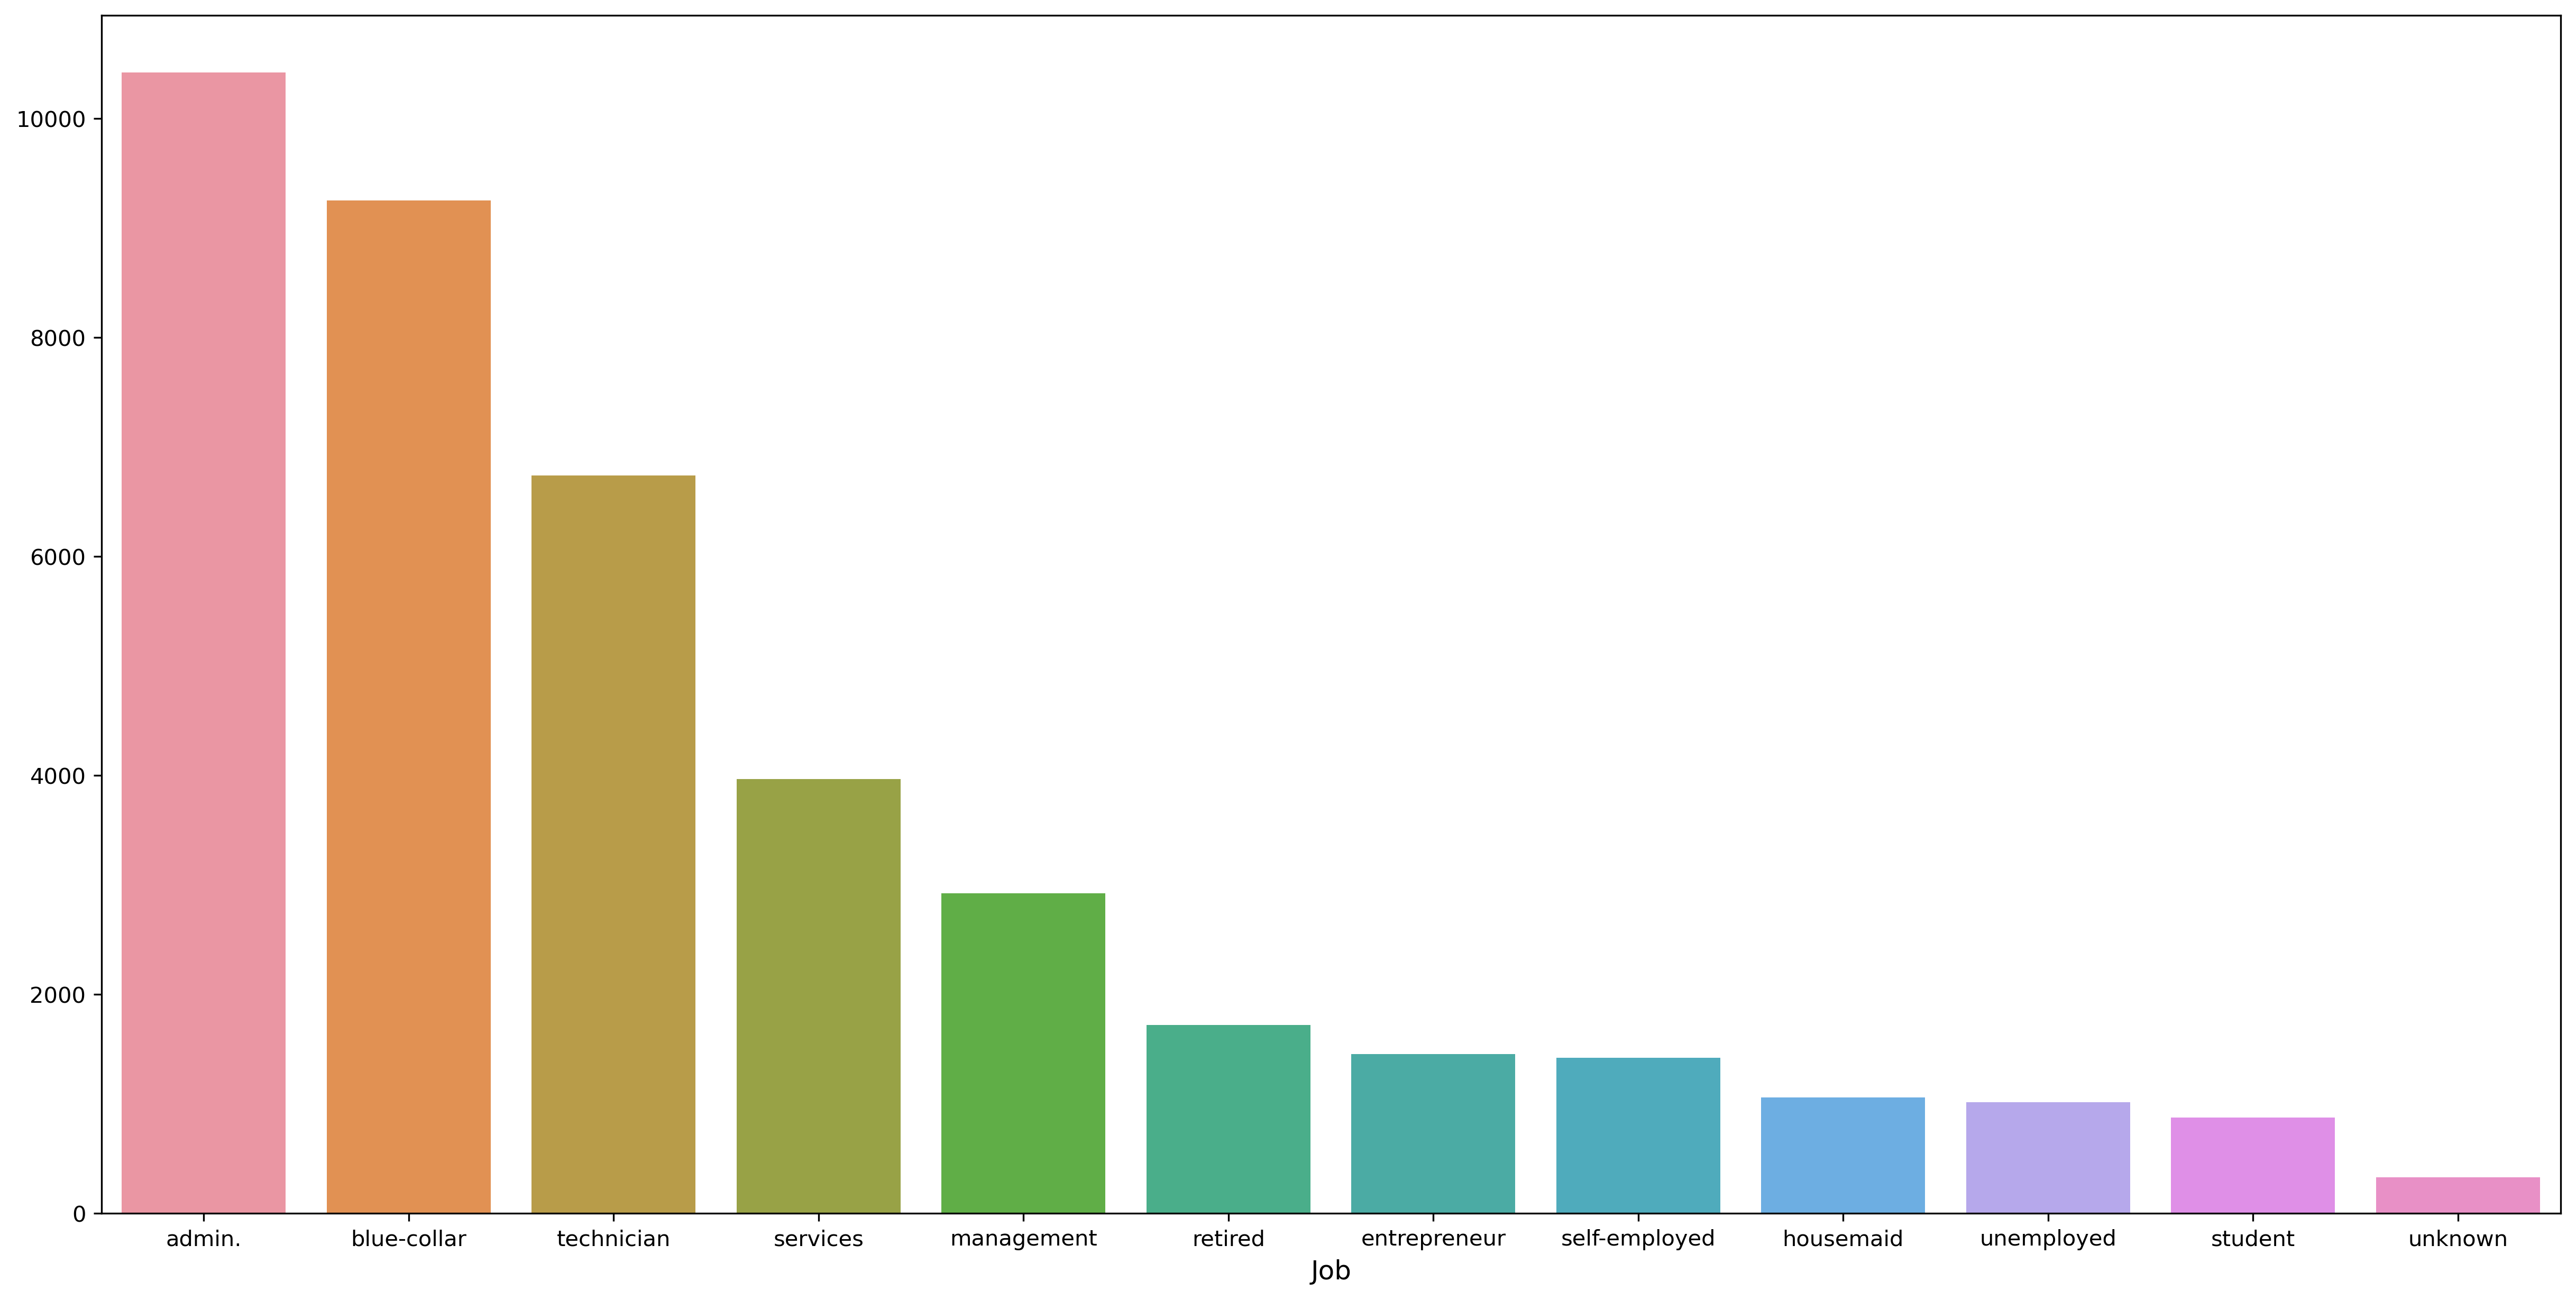

In [176]:
ax = sns.barplot(bank_add_full_data['job'].value_counts().index, bank_add_full_data['job'].value_counts().values)
ax.figure.set_size_inches(20, 10)
ax.set_xlabel('Job', fontsize=12)

Text(0.5, 0, 'Marital')

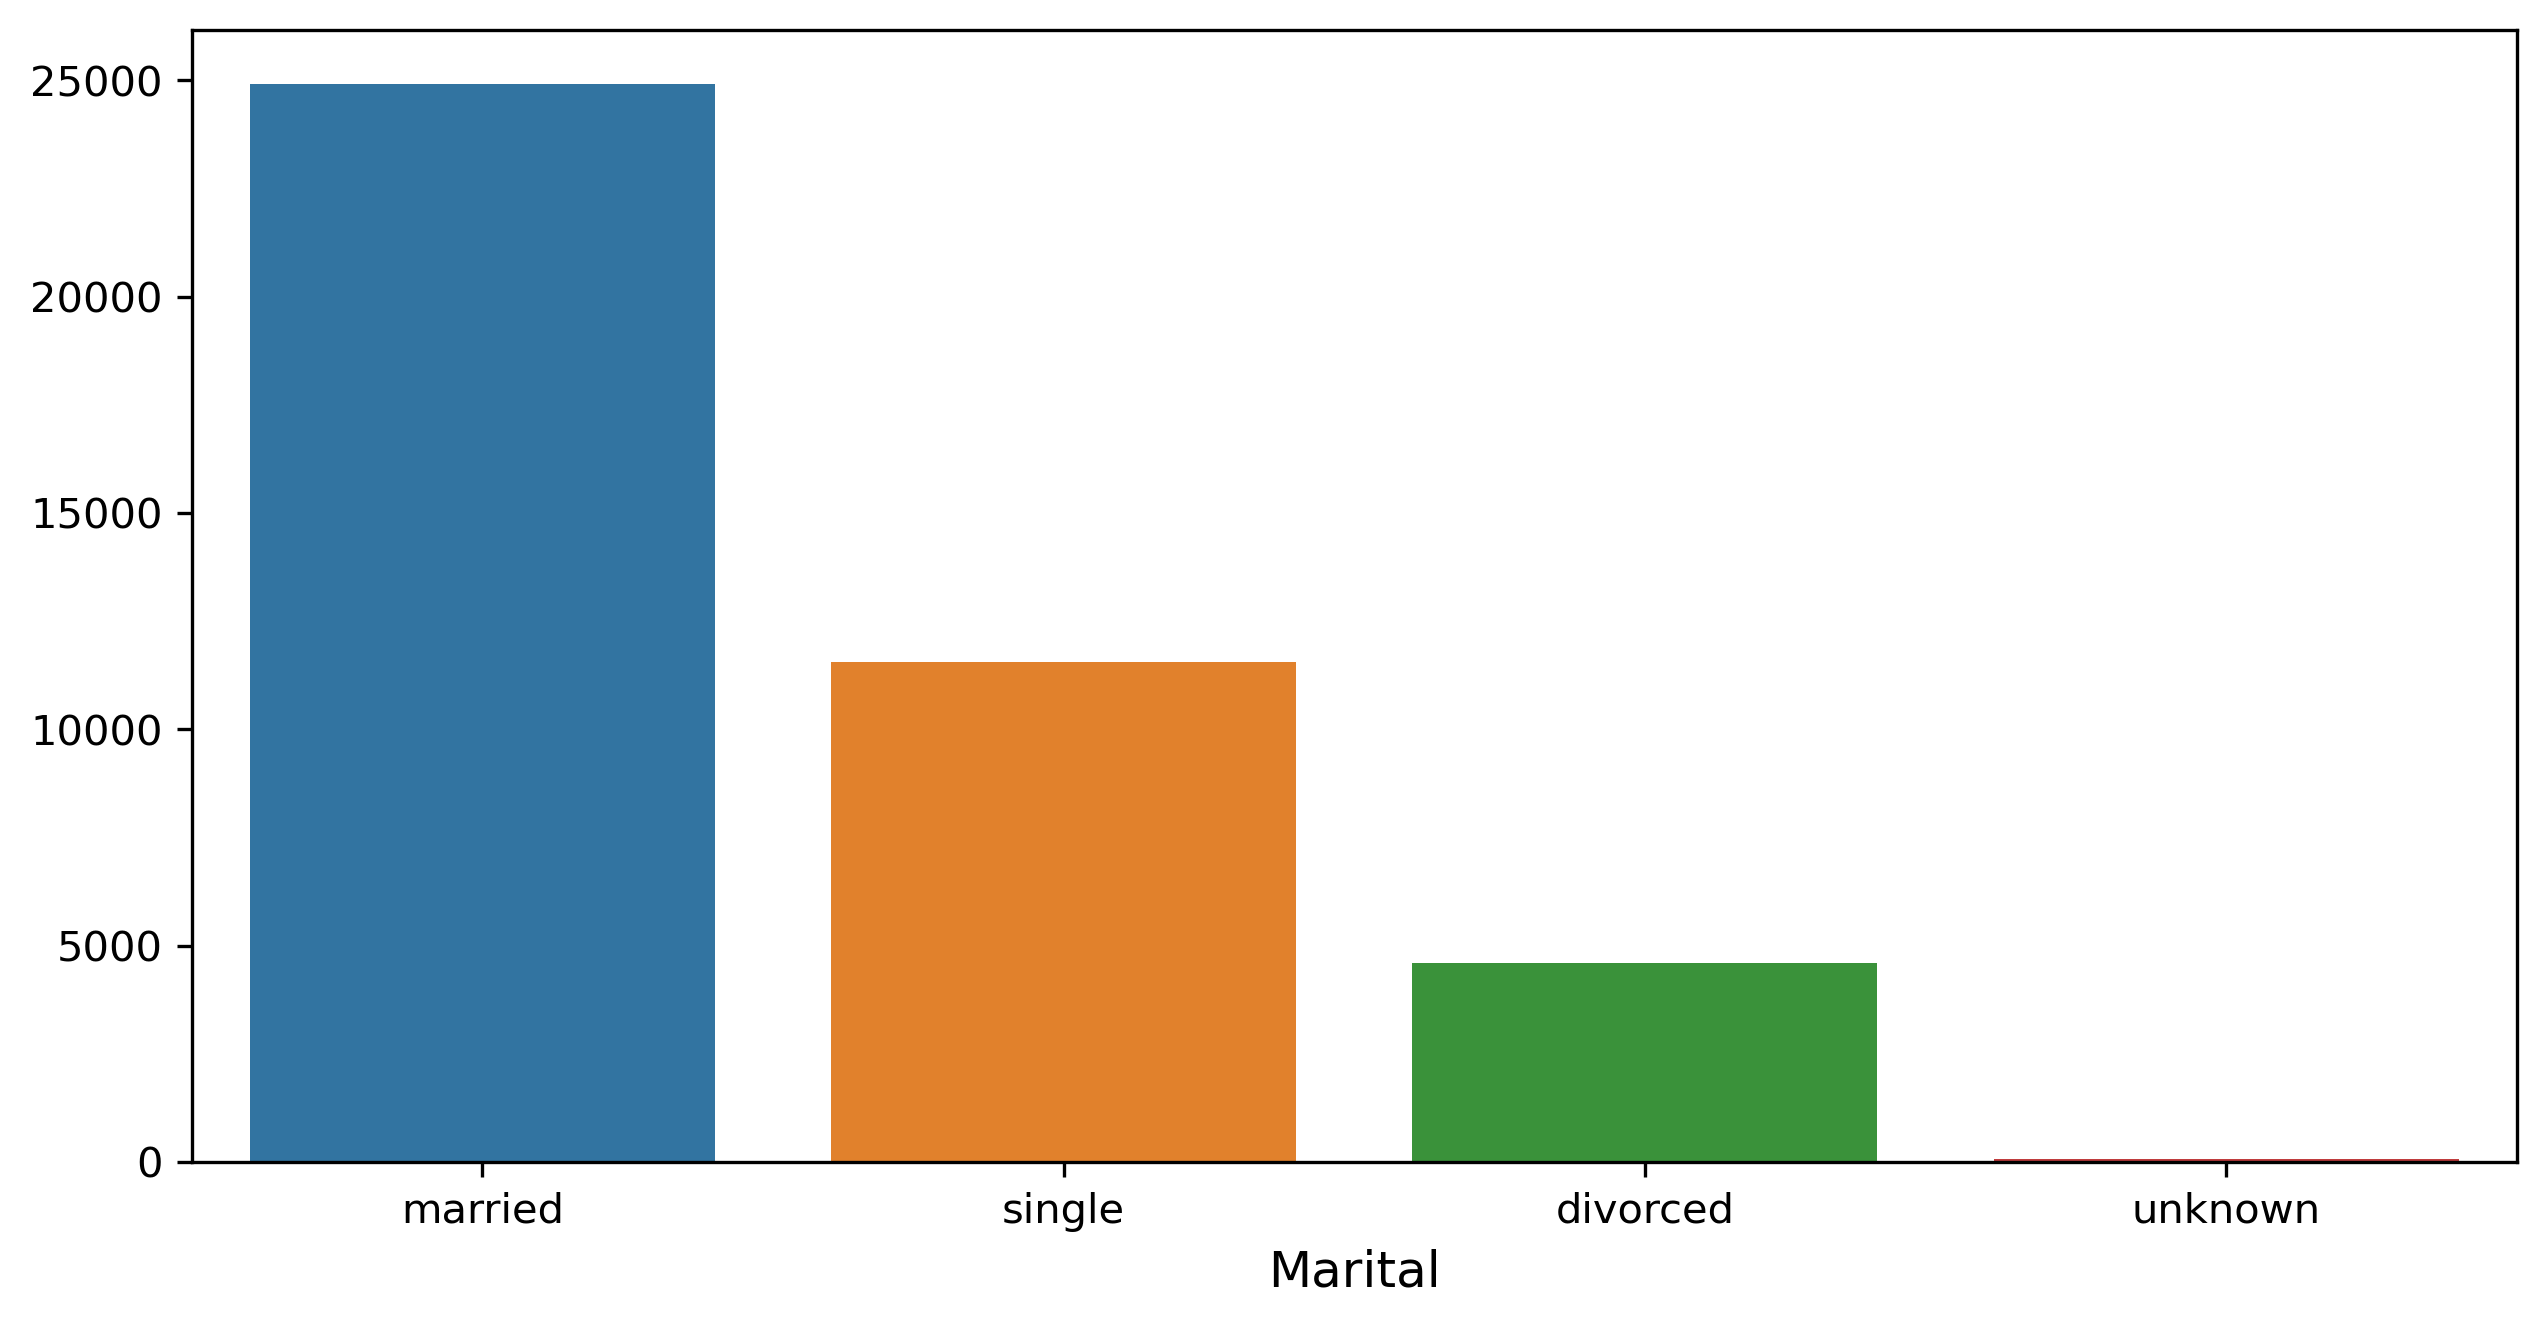

In [177]:
ax = sns.barplot(bank_add_full_data['marital'].value_counts().index, bank_add_full_data['marital'].value_counts().values)
ax.figure.set_size_inches(10, 5)
ax.set_xlabel('Marital', fontsize=12)

Text(0.5, 0, 'Education')

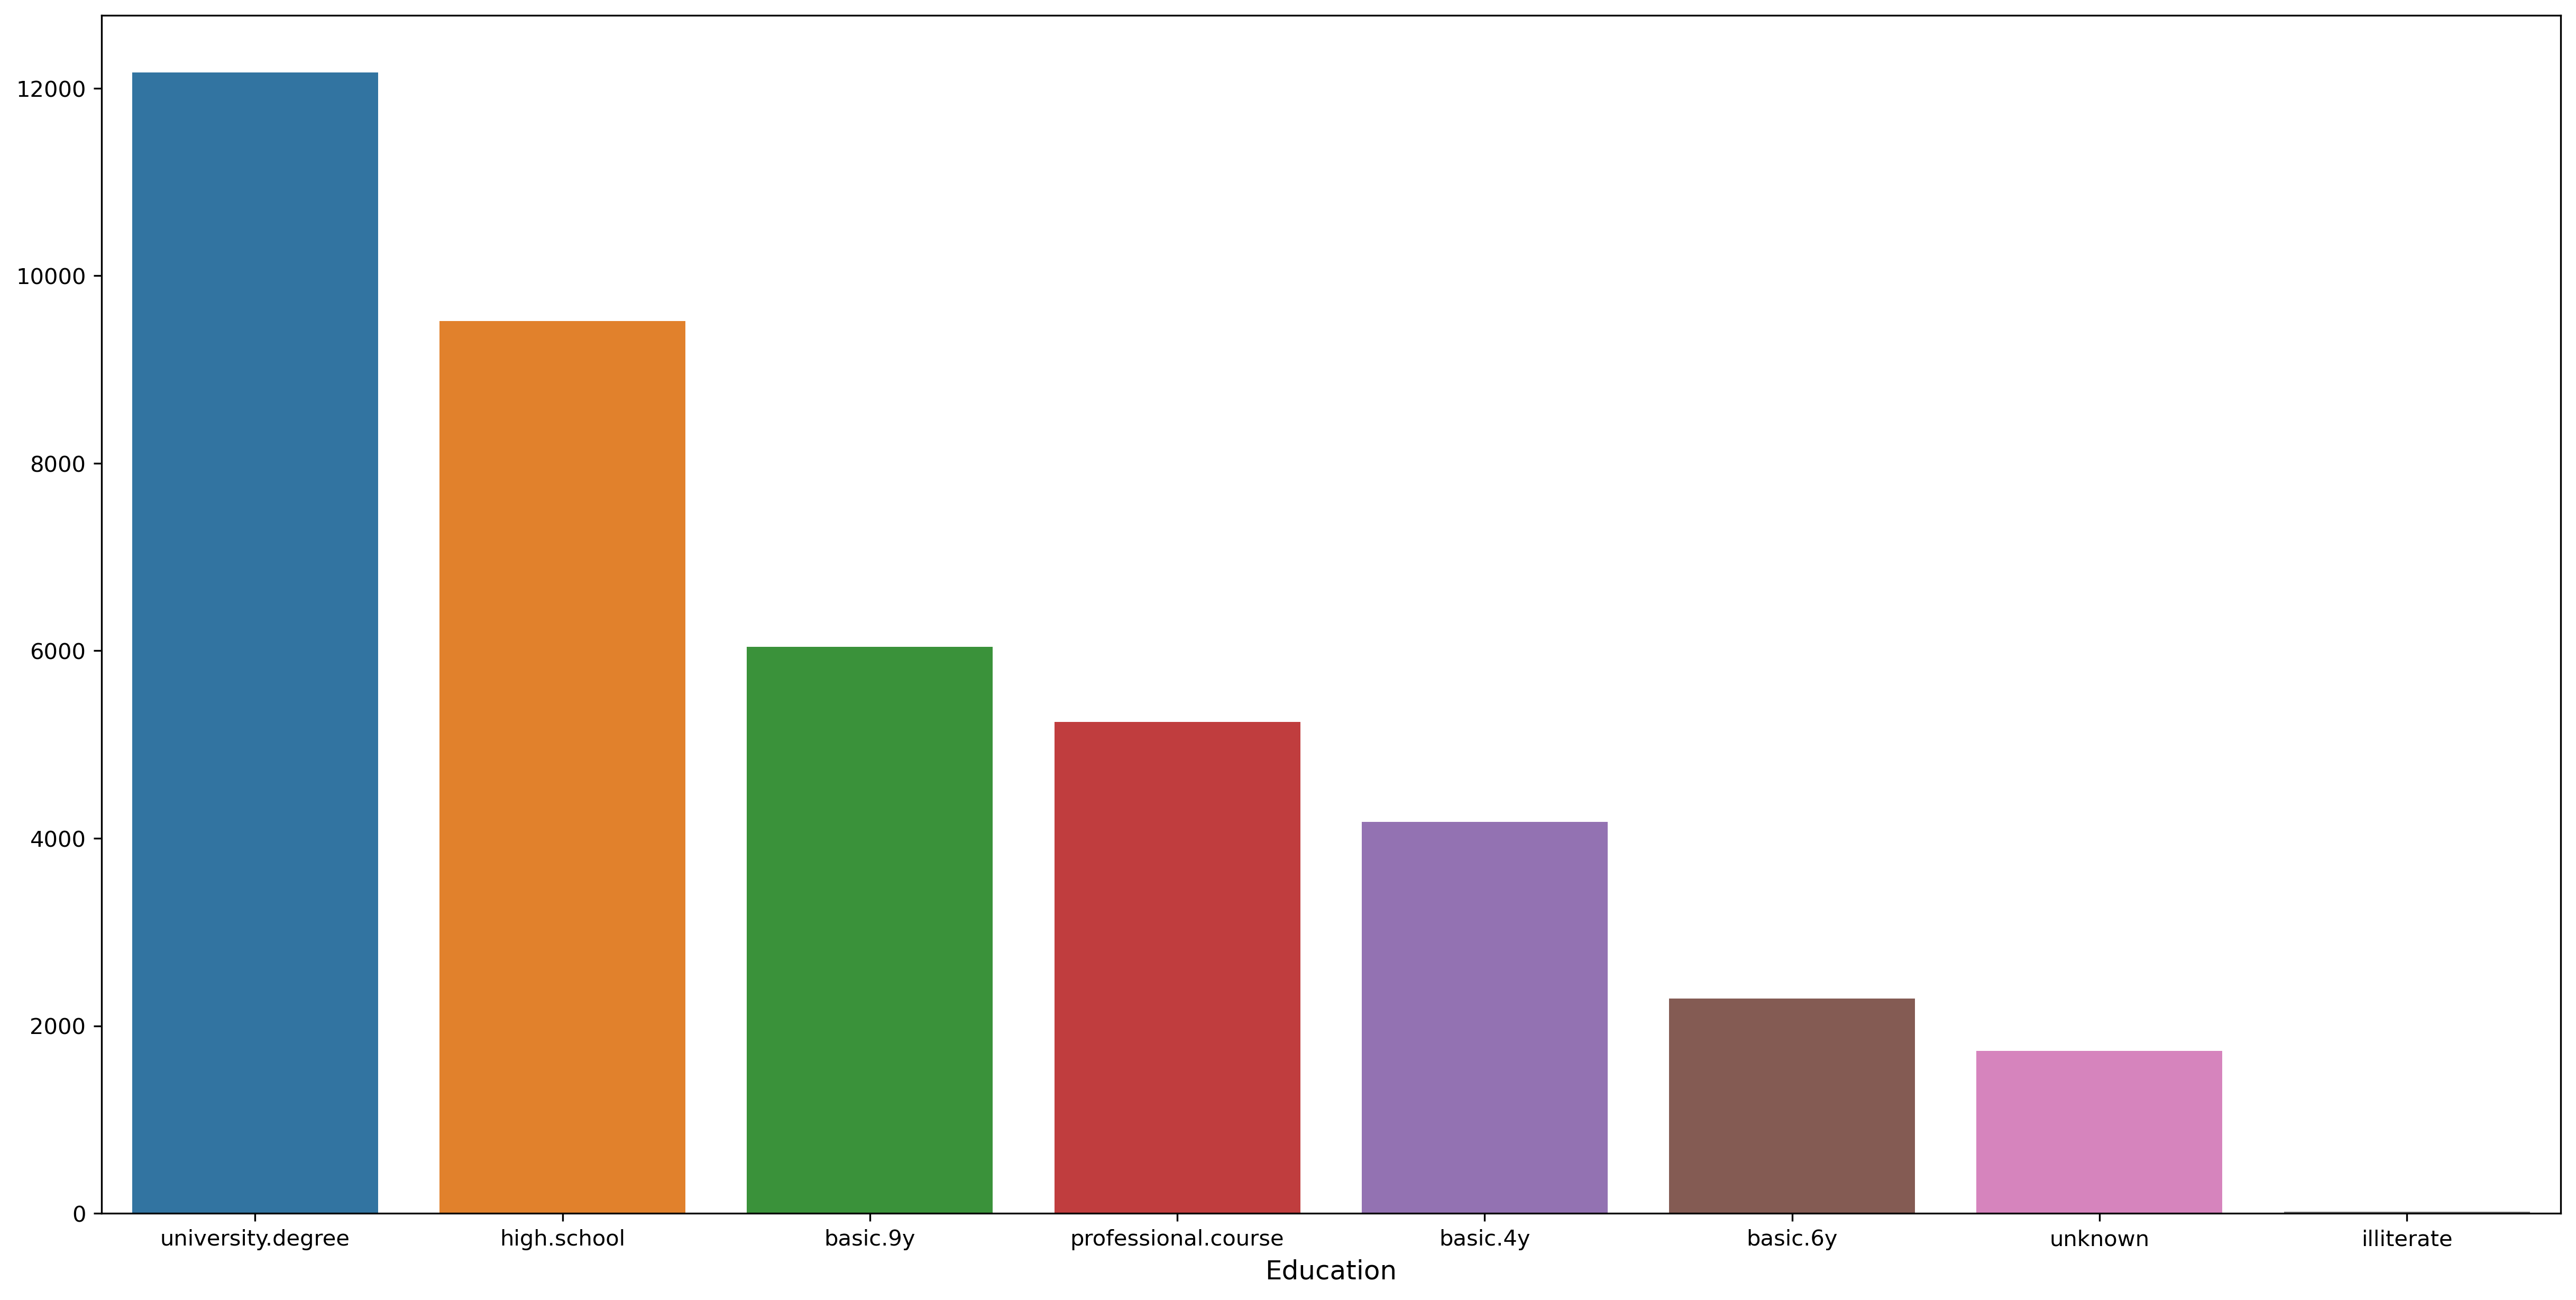

In [178]:
ax = sns.barplot(bank_add_full_data['education'].value_counts().index, bank_add_full_data['education'].value_counts().values)
ax.figure.set_size_inches(20, 10)
ax.set_xlabel('Education', fontsize=12)

Text(0.5, 0, 'Default')

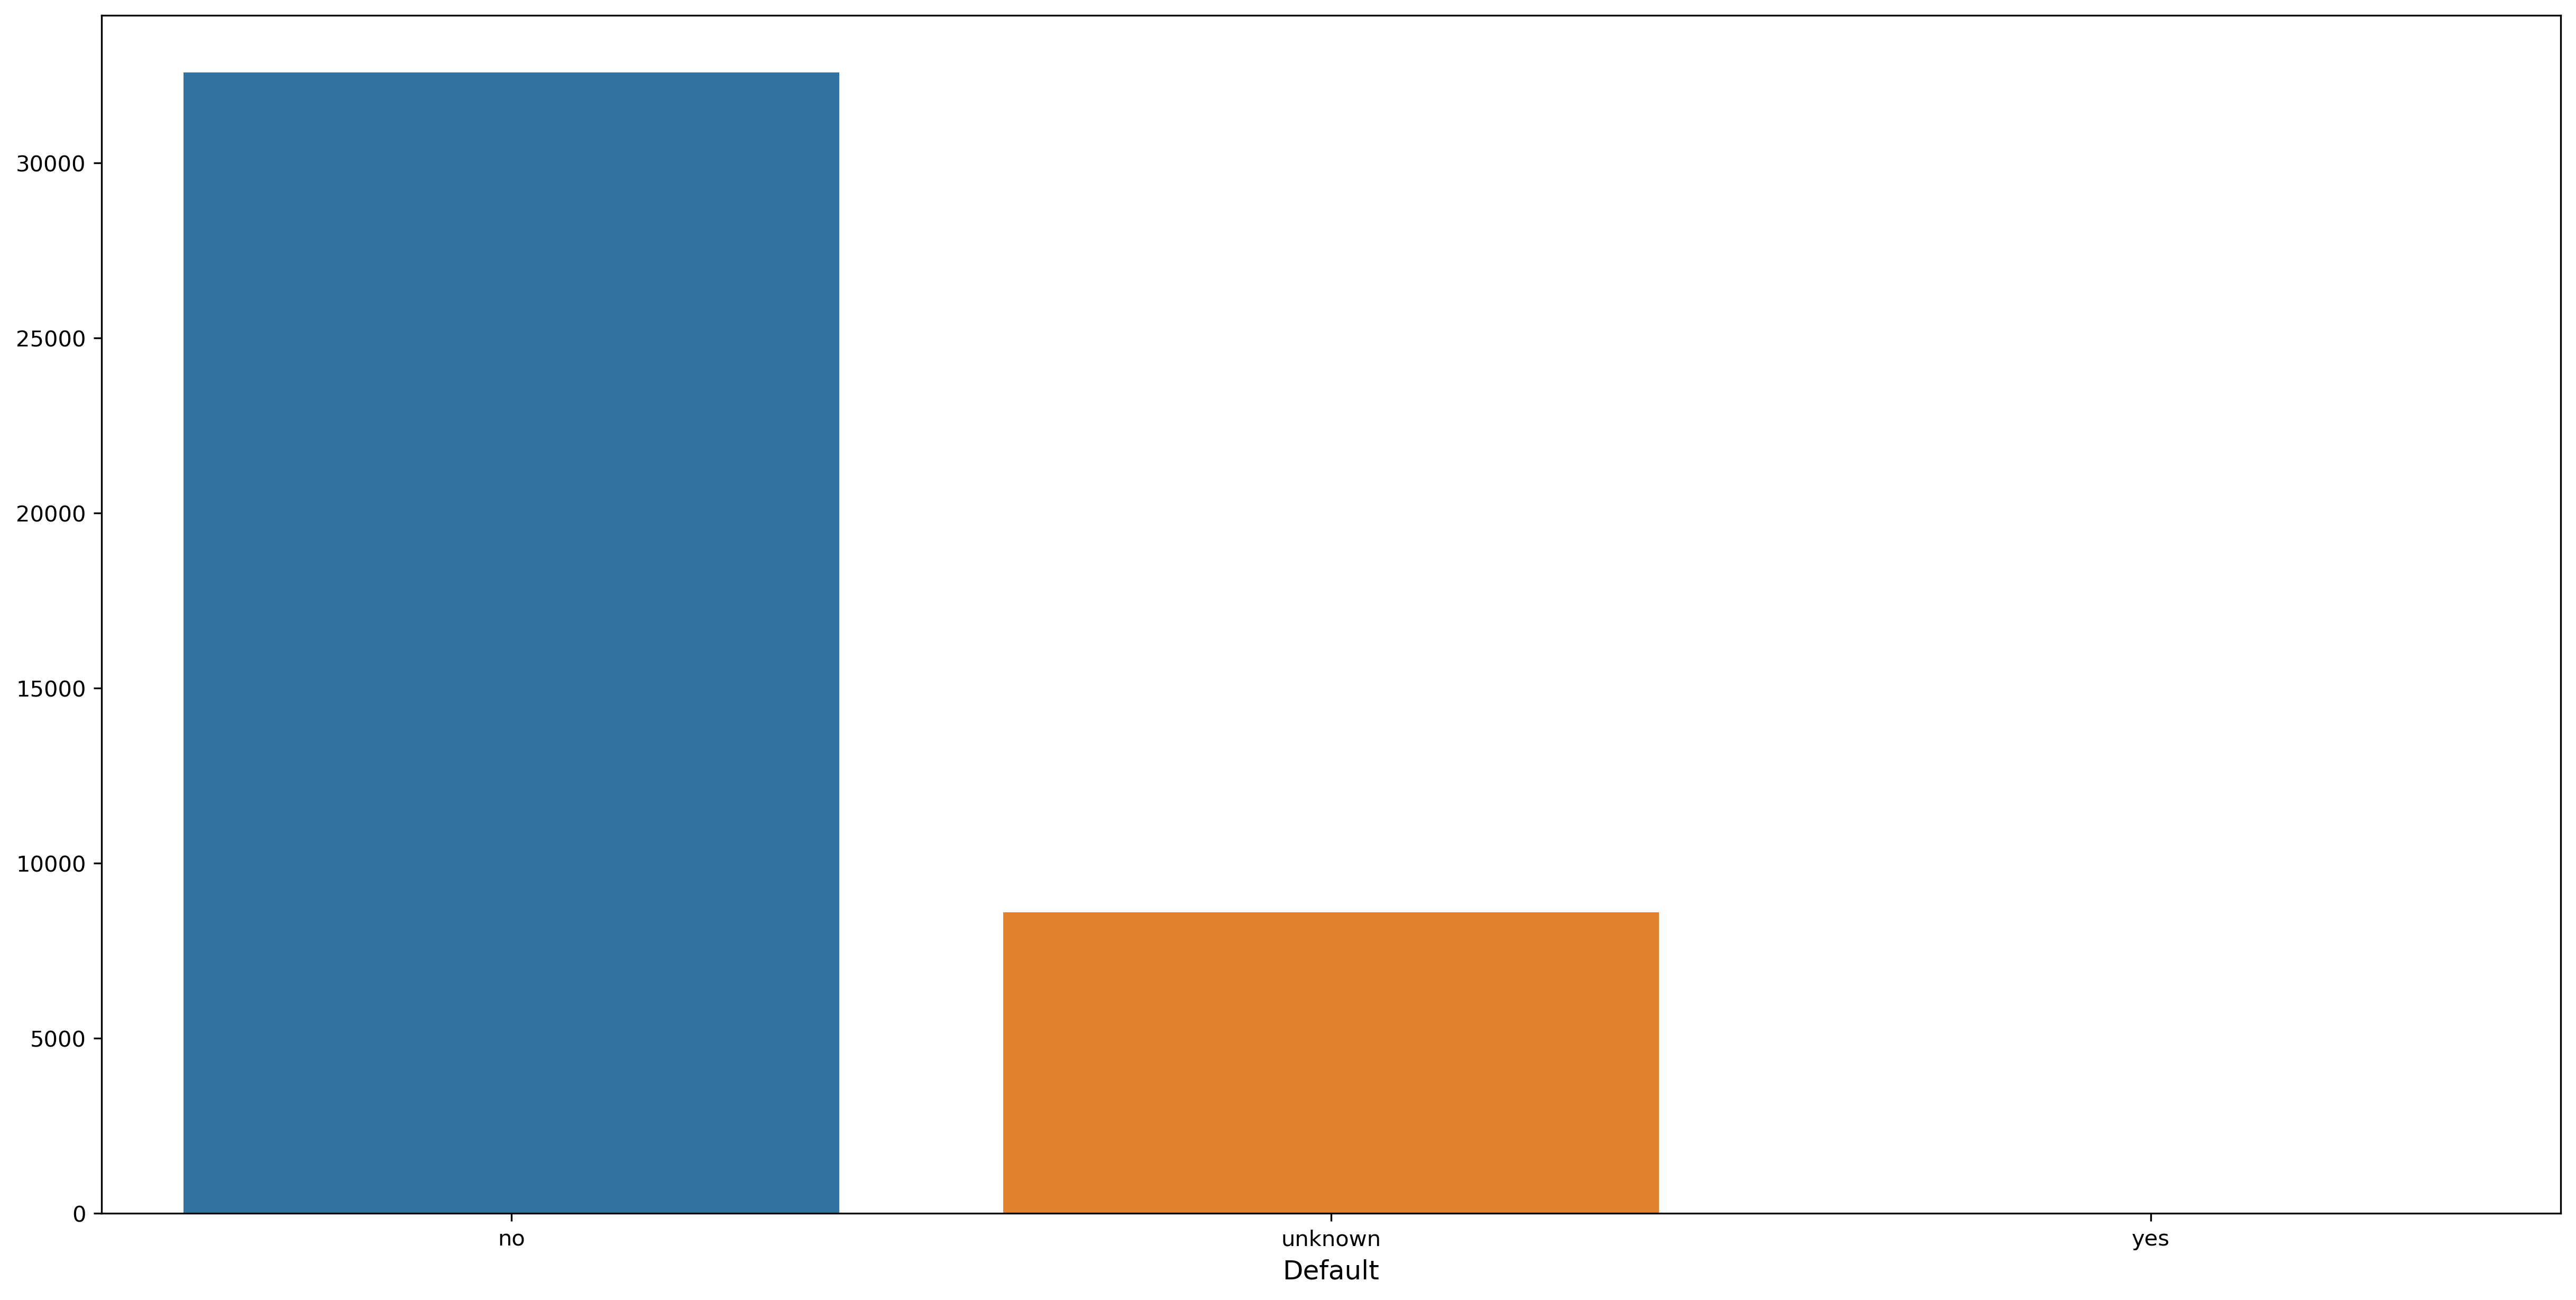

In [179]:
ax = sns.barplot(bank_add_full_data['default'].value_counts().index, bank_add_full_data['default'].value_counts().values)
ax.figure.set_size_inches(20, 10)
ax.set_xlabel('Default', fontsize=12)

Text(0.5, 0, 'Housing')

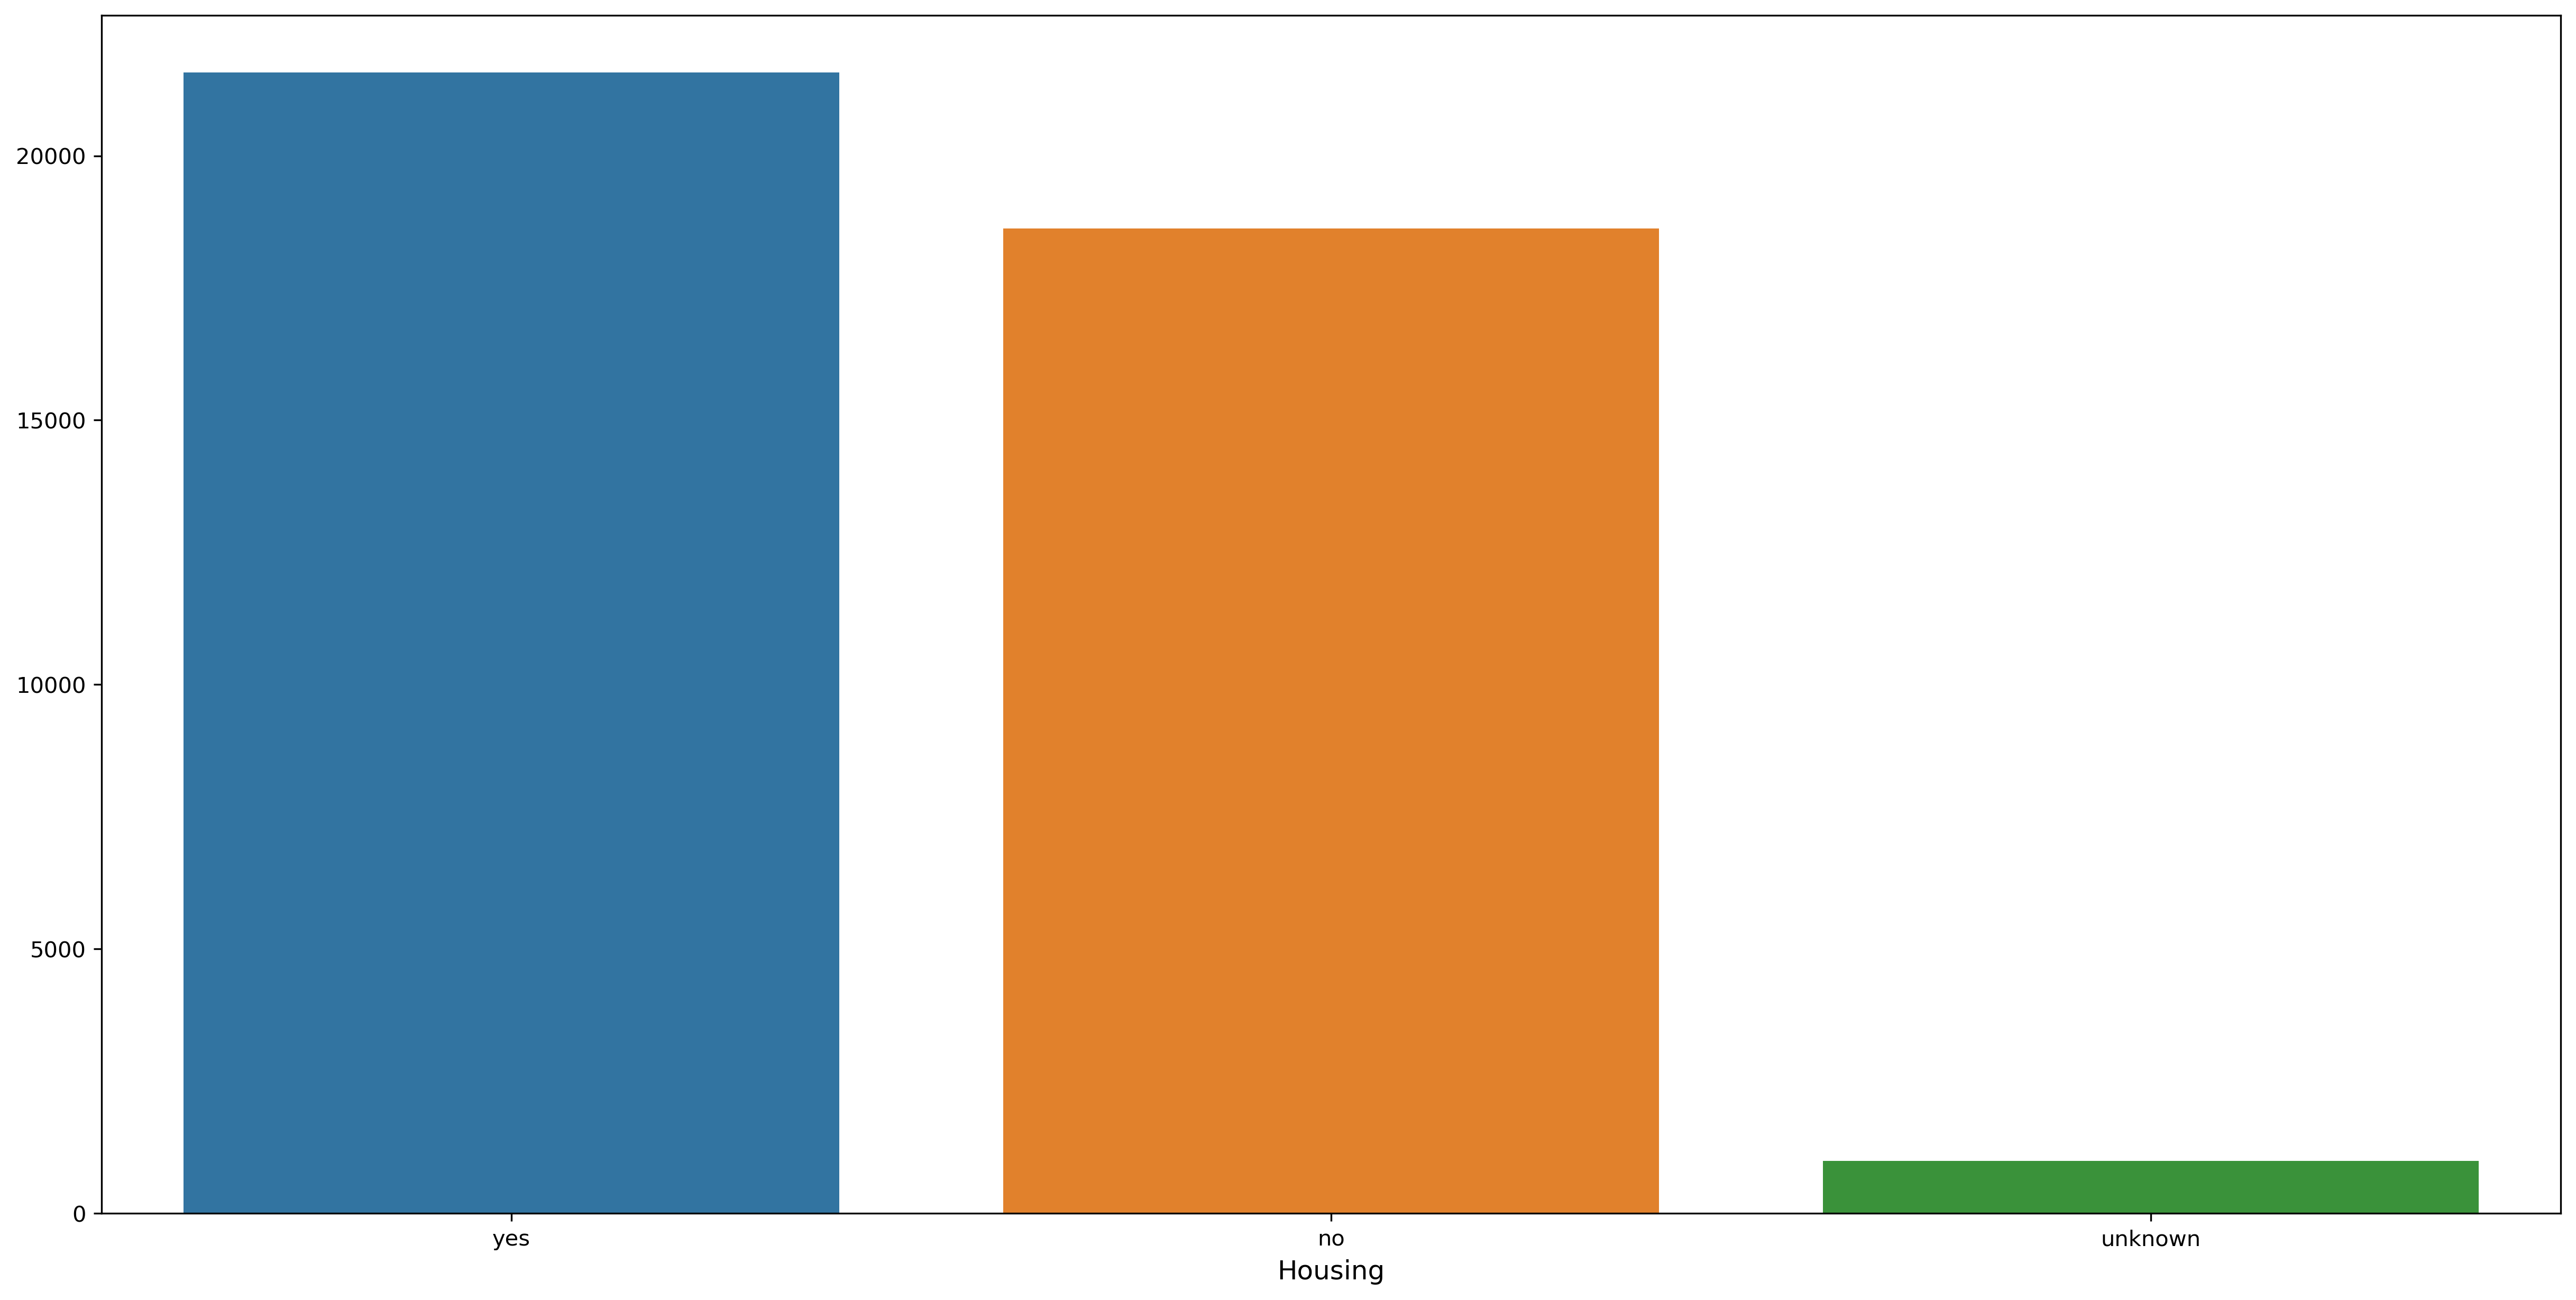

In [180]:
ax = sns.barplot(bank_add_full_data['housing'].value_counts().index, bank_add_full_data['housing'].value_counts().values)
ax.figure.set_size_inches(20, 10)
ax.set_xlabel('Housing', fontsize=12)

Text(0.5, 0, 'Loan')

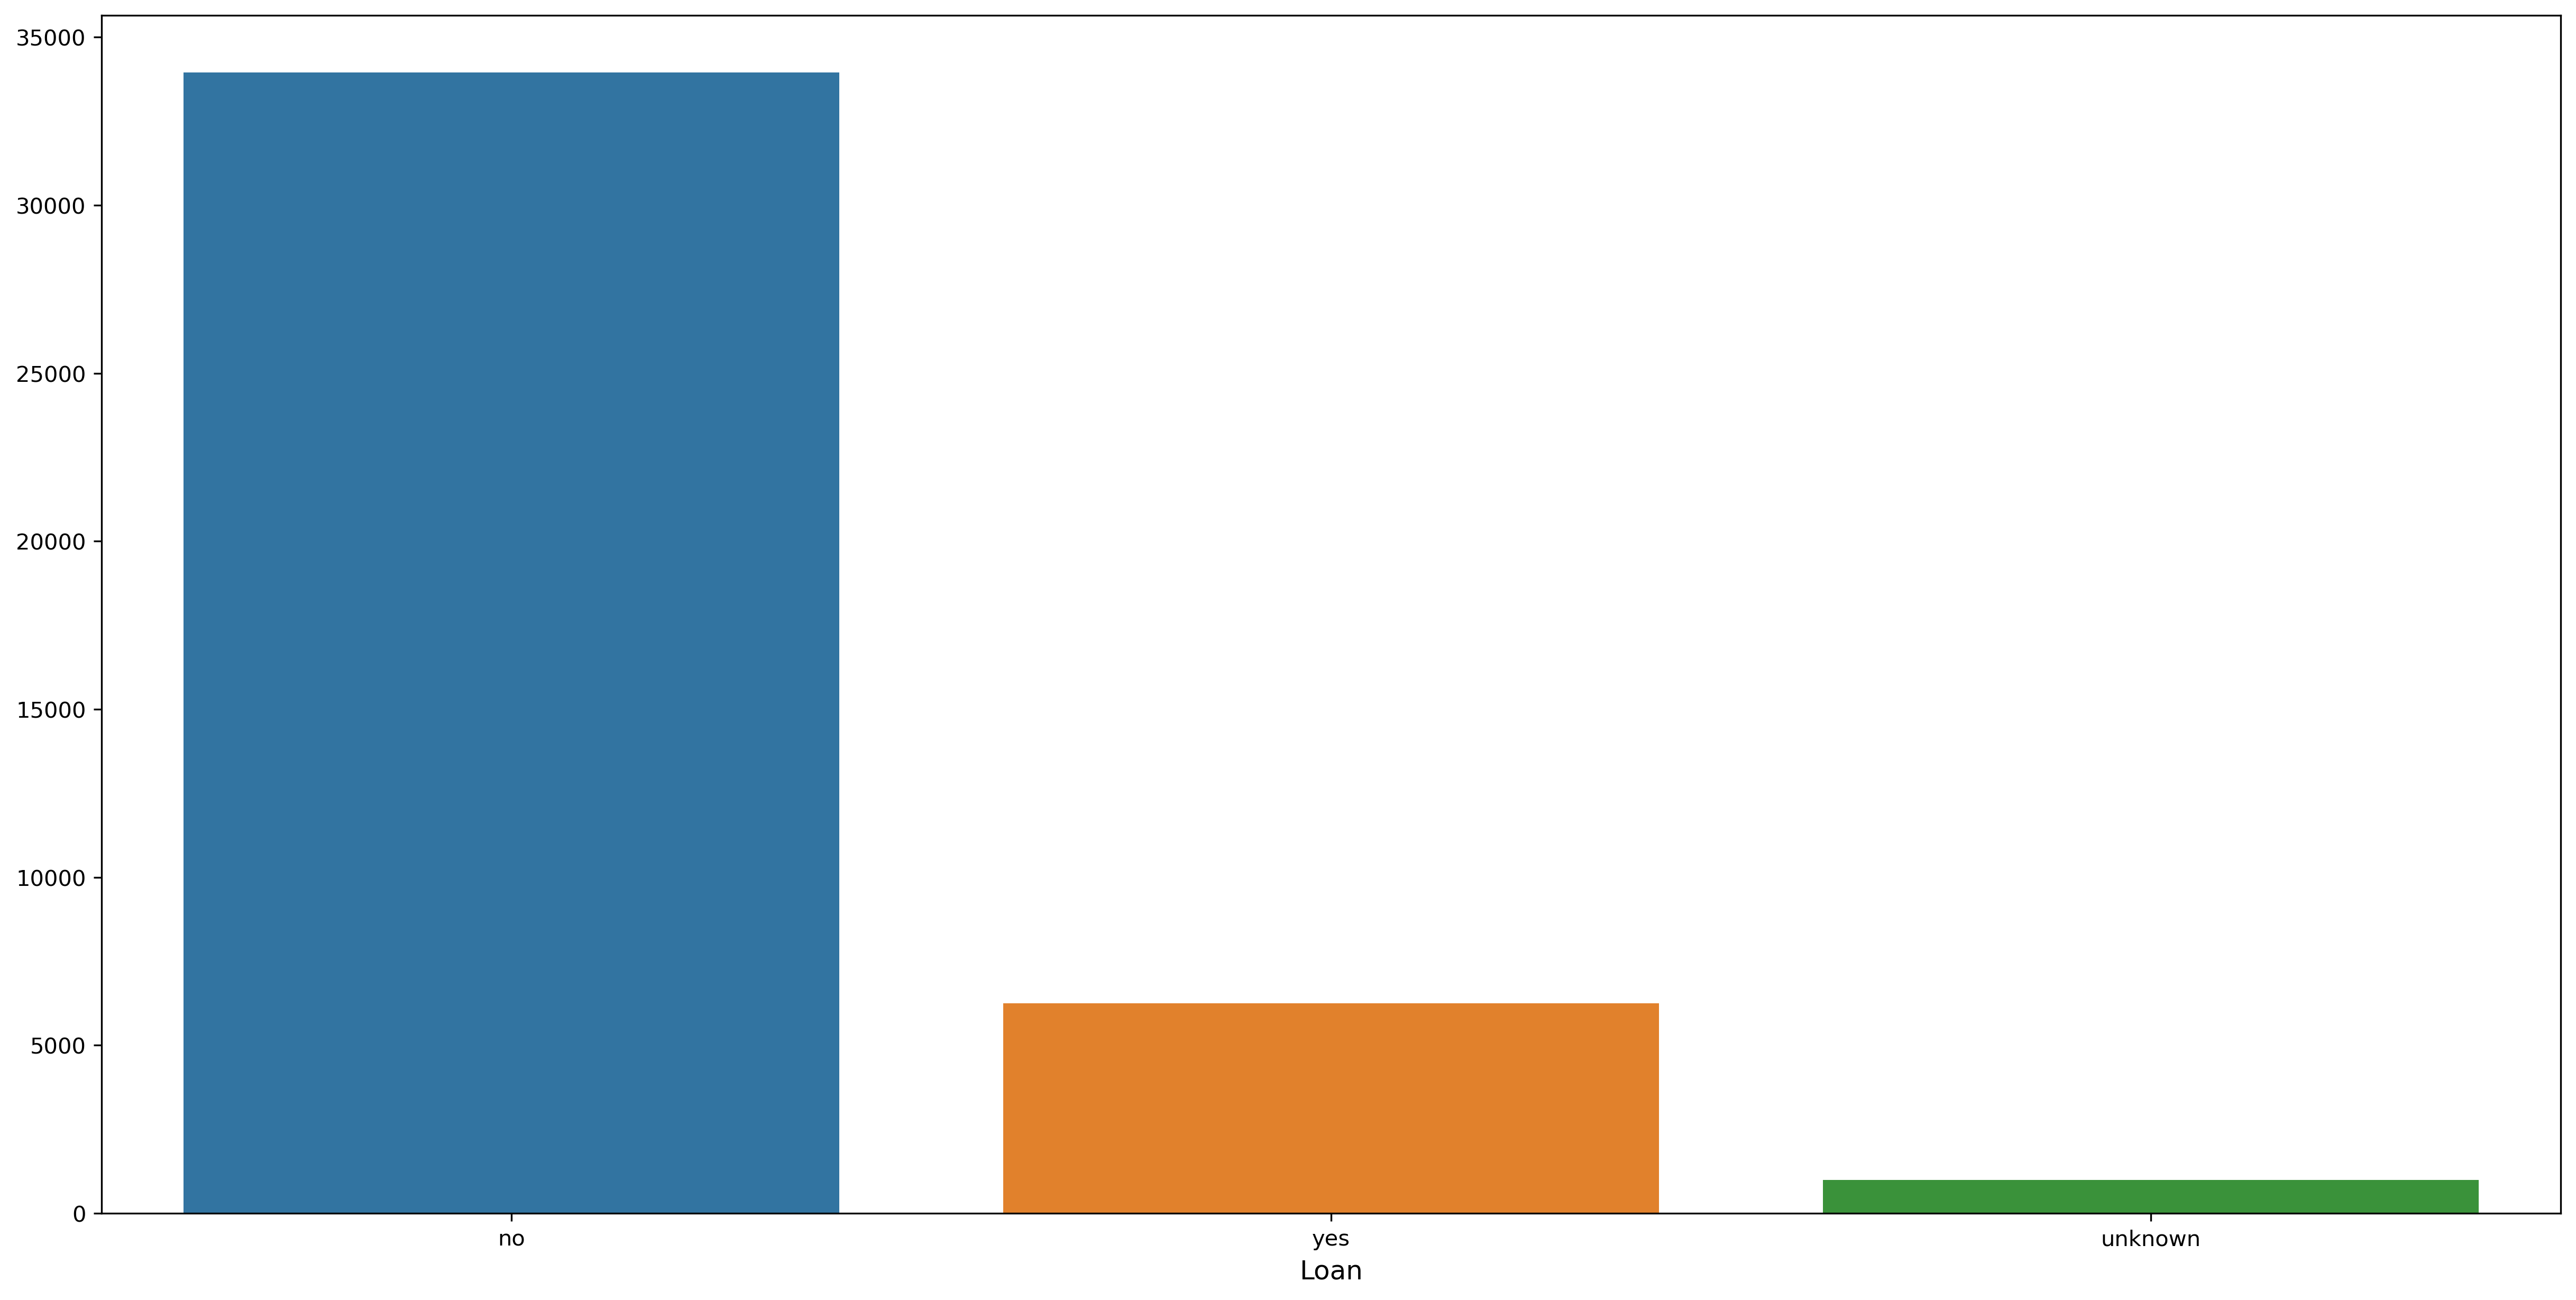

In [181]:
ax = sns.barplot(bank_add_full_data['loan'].value_counts().index, bank_add_full_data['loan'].value_counts().values)
ax.figure.set_size_inches(20, 10)
ax.set_xlabel('Loan', fontsize=12)

Many of these plots include unknown data.

### Data Cleansing

###### Imputation of Categorical Data

In [189]:
pd.crosstab(bank_add_full_data['job'], bank_add_full_data['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [190]:
pd.crosstab(bank_add_full_data['age'], bank_add_full_data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,,,,,,,,,,,,
17,0,0,0,0,0,0,0,0,5,0,0,0
18,0,0,0,0,0,0,0,0,28,0,0,0
19,0,0,0,0,0,0,0,0,42,0,0,0
20,1,7,4,0,0,0,0,3,46,4,0,0
21,12,15,0,1,1,0,2,12,54,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,2,0,0,0,0,0,0
92,0,0,0,0,0,4,0,0,0,0,0,0
94,0,0,0,0,0,1,0,0,0,0,0,0


In [200]:
bank_add_full_data.loc[(bank_add_full_data['age'] > 65) & (bank_add_full_data['job'] == 'unknown'), 'job'] = 'retired'

In [202]:
bank_add_full_data['job'][bank_add_full_data['age'] > 65].value_counts()

retired          543
housemaid         32
admin.            14
management         9
technician         6
blue-collar        5
entrepreneur       4
unemployed         3
self-employed      2
services           1
Name: job, dtype: int64

In [205]:
bank_add_full_data.loc[(bank_add_full_data['education'] =='unknown') & (bank_add_full_data['job'] =='management'), 'education'] = 'university.degree'
bank_add_full_data.loc[(bank_add_full_data['education'] =='unknown') & (bank_add_full_data['job'] =='services'), 'education'] = 'high.school'
bank_add_full_data.loc[(bank_add_full_data['education'] =='unknown') & (bank_add_full_data['job'] =='housemaid'), 'education'] = 'basic.4y'
bank_add_full_data.loc[(bank_add_full_data['job'] == 'unknown') & (bank_add_full_data['education'] =='basic.4y'), 'job'] = 'blue-collar'
bank_add_full_data.loc[(bank_add_full_data['job'] == 'unknown') & (bank_add_full_data['education'] =='basic.6y'), 'job'] = 'blue-collar'
bank_add_full_data.loc[(bank_add_full_data['job'] == 'unknown') & (bank_add_full_data['education'] =='basic.9y'), 'job'] = 'blue-collar'

In [206]:
pd.crosstab(bank_add_full_data['job'], bank_add_full_data['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2366,1448,3654,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,516,77,94,174,1,59,139,0
management,100,85,166,298,0,89,2186,0
retired,601,75,145,276,3,243,286,112
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2832,0,218,173,0
student,26,13,99,357,0,43,170,167


We have successfully imputed the data from the age, education, and job categories according to the data.

###### Replacing Unkown values

In [207]:
bank_add_full_data.replace("unknown", np.nan, inplace=True)
bank_add_full_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
